# Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards.

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Best Practices for Notebook : 

* The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
* The notebook should be run from start to finish sequentially before submission.
* It is preferable to remove all warnings and errors before submission.

### Submission Guidelines :

1. The submission should be: well commented Jupyter notebook [format - .HTML] - Please run the notebook sequentially before submitting.
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4. Submission will not be evaluated if:
    - it is submitted post-deadline, or,
    - more than 1 files are submitted

## Scoring guide (Rubric) - CreditCard Users Churn Prediction

| Criteria                                                       |   Points                     |
| :------------------------------------------------------------- | ---------------------------: |
| **Perform an Exploratory Data Analysis on the data:** - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive| 6       |
| **Illustrate the insights based on EDA:** Key meaningful observations on the relationship between variables | 5 |
| **Data Pre-processing:** Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling | 5  |
| **Model building - Logistic Regression:** - Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required | 6  |
| **Model building - Bagging and Boosting:** - Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models  | 8 |
| **Hyperparameter tuning using grid search:** - Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning | 8 |
| **Hyperparameter tuning using random search:** - Tune the best 3 models using random search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning | 8 |
| **Model Performances:** - Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization | 5 |
| **Actionable Insights & Recommendations:** - Business recommendations and insights | 5 |
| **Notebook - Overall quality:** - Structure and flow - Well commented code | 4 |
|                                                                            |   |
| **Total**                                                                  | 60|

# Preparatory Steps

## Pre-requisities

I have a local python environment setup using Miniconda. Here is the environment file for my environment.
**It is recommended to use a similar/same environment to run this notebook to be able to reproduce the outcomes and not have any side-effects or get warnings due to differing versions of the packages**

After installing [miniconda](https://docs.conda.io/en/latest/miniconda.html), please follow the below steps:
1. Create a new empty file and call it ```environment.yaml```.
2. Open terminal and run the below commands:

```bash
# optional - if you don't already have jupyter and are starting off with miniconda
conda install -y jupyter

# run this command from the same directory where you saved your environment file
conda env create -v -f environment.yaml

conda activate gl-tensorflow

python -m ipykernel install --user --name gl-tensorflow --display-name "GL-Python-3.7 (tensorflow)"
```

**Environment File:**
```yaml
name: gl-tensorflow
dependencies:
    - python=3.7
    - pip>=20.0
    - jupyter
    - tensorflow=2.0
    - scikit-learn
    - scipy
    - pandas>=1.0.1
    - pandas-datareader
    - matplotlib
    - pillow
    - tqdm
    - requests
    - h5py
    - pyyaml
    - flask
    - boto3
    - xgboost
    - openpyxl
    - scikit-learn-intelex
    - seaborn
    - statsmodels
    - imbalanced-learn
    - pip:
        - bayesian-optimization
        - gym
        - kaggle
```

We will start by loading the required packages and libraries that would be needed for data loading, transformation, visualization, imputation and model building. We will be using the following python packages:

* NumPy
* Pandas
* Matplotlib
* Seaborn
* Scikit Learn
* XgBoost
* imbalanced-learn (imported as imblearn)
* Warnings: To avoid listing warnings in our notebook to keep it tidy

**PS:** The data file ```BankChurners.csv``` should be placed in the same directory as the notebook and the file name casing would matter if you are on a case-sensitive file system (Linux/MAC)

In [1]:
# for data loading, transformation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# use the inline backend for matplotlib to render output inline in the notebook.
%matplotlib inline
import seaborn as sns
# needed to turn of render of warnings in notebook outputs
import warnings
warnings.filterwarnings('ignore')

#random
import scipy.stats as stats

# sklearn ecosystem
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearnex import patch_sklearn
# xgboost
from xgboost import XGBClassifier
import time
# patch sklearn using Intel(R) Extension for Scikit-learn to improve performance
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Load Data

Now we will load the data and try to understand the data in terms of following:
1. Shape and Size of Data
2. Data Types of Various Columns
3. Composition in terms of Categorical, Discrete and Continuous Values
4. Missing/Invalid values
5. Distribution of Target Values (positive vs negative classes)

In [2]:
bank_customers_df = pd.read_csv('BankChurners.csv')
bank_customers_df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
print(f'Data Shape: {bank_customers_df.shape}')
print(f'\nData Types:\n{bank_customers_df.info()}')

Data Shape: (10127, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-n

In [4]:
# let's see the ranges of numerical values
bank_customers_df.describe().apply(lambda series: series.apply(lambda value: format(value, 'g'))).transpose()

count         mean          std          min  \
CLIENTNUM                 10127  7.39178e+08  3.69038e+07  7.08082e+08   
Customer_Age              10127       46.326      8.01681           26   
Dependent_count           10127       2.3462      1.29891            0   
Months_on_book            10127      35.9284      7.98642           13   
Total_Relationship_Count  10127      3.81258      1.55441            1   
Months_Inactive_12_mon    10127      2.34117      1.01062            0   
Contacts_Count_12_mon     10127      2.45532      1.10623            0   
Credit_Limit              10127      8631.95      9088.78       1438.3   
Total_Revolving_Bal       10127      1162.81      814.987            0   
Avg_Open_To_Buy           10127      7469.14      9090.69            3   
Total_Amt_Chng_Q4_Q1      10127     0.759941     0.219207            0   
Total_Trans_Amt           10127      4404.09      3397.13          510   
Total_Trans_Ct            10127      64.8587      23.4726           10   
Total_Ct_Chng_Q4_Q1       10127     0.712222     0.238086            0   
Avg_Utilization_Ratio     10127     0.274894     0.275691            0   

                                  25%          50%          75%          max  
CLIENTNUM                 7.13037e+08  7.17926e+08  7.73144e+08  8.28343e+08  
Customer_Age                       41           46           52           73  
Dependent_count                     1            2            3            5  
Months_on_book                     31           36           40           56  
Total_Relationship_Count            3            4            5            6  
Months_Inactive_12_mon              2            2            3            6  
Contacts_Count_12_mon               2            2            3            6  
Credit_Limit                     2555         4549      11067.5        34516  
Total_Revolving_Bal               359         1276         1784         2517  
Avg_Open_To_Buy                1324.5         3474         9859        34516  
Total_Amt_Chng_Q4_Q1            0.631        0.736        0.859        3.397  
Total_Trans_Amt                2155.5         3899         4741        18484  
Total_Trans_Ct                     45           67           81          139  
Total_Ct_Chng_Q4_Q1             0.582        0.702        0.818        3.714  
Avg_Utilization_Ratio           0.023        0.176        0.503        0.999

In [5]:
print(f'Null Values: {bank_customers_df.isnull().sum().sum()}')
print(f'Na Values: {bank_customers_df.isna().sum().sum()}')

Null Values: 0
Na Values: 0


In [6]:
bank_customers_df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [7]:
print(f"Unique Attrition_Flag Values:\n{bank_customers_df['Attrition_Flag'].value_counts()}")
negative_values = bank_customers_df['Attrition_Flag'].value_counts()[0]
positive_values = bank_customers_df['Attrition_Flag'].value_counts()[1]
negative_percentage = (negative_values/(negative_values+positive_values))*100
positive_percentage = (positive_values/(negative_values+positive_values))*100
print(f"\nNegative Vs Positive:\n\tNegative%: {negative_percentage}\n\tPositive%: {positive_percentage}")
print(f"\nUnique Gender Values:\n{bank_customers_df['Gender'].value_counts()}")
print(f"\nUnique Education_Level Values:\n{bank_customers_df['Education_Level'].value_counts()}")
print(f"\nUnique Marital_Status Values:\n{bank_customers_df['Marital_Status'].value_counts()}")
print(f"\nUnique Income_Category Values:\n{bank_customers_df['Income_Category'].value_counts()}")
print(f"\nUnique Card_Category Values:\n{bank_customers_df['Card_Category'].value_counts()}")

Unique Attrition_Flag Values:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Negative Vs Positive:
	Negative%: 83.934037720944
	Positive%: 16.065962279055988

Unique Gender Values:
F    5358
M    4769
Name: Gender, dtype: int64

Unique Education_Level Values:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Unique Marital_Status Values:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Unique Income_Category Values:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Unique Card_Category Values:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


# High Level Observations

Based on the above analysis we can say that:
* CLIENTNUM is a unique customer identifier and has no statistical significance and can be dropped right away.
* Attrition_Flag is the target variable that we want to predict - it is binary indicator where the value ```Existing Customer``` means that the customer has not churned whereas the value ```Attrited Customer``` indicates that the customer has churned. We will convert this into simple 0 & 1 labels respectively.
* Dataset is imbalanced with more datapoints where the cutomer has not churned.
* There are no missing/null values in the data
* We have 5 categorical data points which are:
    - Gender
    - Education_Level
    - Marital_Status
    - Income_Category
    - Card_Category
* In all of the categorical columns except for ```Gender``` & ```Card_Category``` we have ```Unknown``` values which can be treated as normal categories - I will not treat them as missing values because they represent cases where the customer might not have disclosed this information because:
    - Values like education level, marital status, income category are optional in most data collection processe and the customer can withhold such information due to privacy reasons.
    - I will theorize that this attribute can be treated as a part of customer behavior where they have not disclosed these attributes (to be confirmed later in the EDA using univariate and bivariate analysis.
* In addition to the above categorical values we also have a few discrete numerical values which are:
    - Dependent_count
    - Months_on_book
    - Total_Relationship_Count
    - Months_Inactive_12_mon
    - Contacts_Count_12_mon
    - Total_Trans_Ct

In [8]:
# actions based on above analysis
# 1. Get rid of CLIENTNUM column
bank_customers_df.drop(['CLIENTNUM'], axis=1, inplace=True)
bank_customers_df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

# Perform an Exploratory Data Analysis on the data: - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive (6 points)

## Univariate Analysis & Bivariate Analysis
Let's visualize the data and see what trends we see in data.

| Column Name                 | Type             |
| :-------------------------: | :--------------: |
| Attrition_Flag              | Cat/Dependent    |
| Customer_Age                | Dis/Independent  |
| Gender                      | Cat/Independent  |
| Dependent_count             | Dis/Independent  |
| Education_Level             | Cat/Independent  |
| Marital_Status              | Cat/Independent  |
| Income_Category             | Cat/Independent  |
| Card_Category               | Cat/Independent  |
| Months_on_book              | Dis/Independent  |
| Total_Relationship_Count    | Dis/Independent  |
| Months_Inactive_12_mon      | Dis/Independent  |
| Contacts_Count_12_mon       | Dis/Independent  |
| Credit_Limit                | Cont/Independent |
| Total_Revolving_Bal         | Cont/Independent |
| Avg_Open_To_Buy             | Cont/Independent |
| Total_Amt_Chng_Q4_Q1        | Cont/Independent |
| Total_Trans_Amt             | Cont/Independent |
| Total_Trans_Ct              | Dis/Independent  |
| Total_Ct_Chng_Q4_Q1         | Cont/Independent |
| Avg_Utilization_Ratio       | Cont/Independent |

**Legend:**
- *Cat/Dependent:* Categorical Dependent/Target variable.
- *Dis/Independent:* Discrete Independent Variable
- *Cat/Independent:* Categorical Independent Variable
- *Cont/Independent:* Categorical Independent Variable

### Visualization Techniques
We will visulaize the different kinds of data using different kinds of Visualization techniques.

#### Continuous Values
- Use historgrams to visualize distribution in relation to target variable
- Use BoxPlot to understand central tendency and outliers

**Columns:**
* Credit_Limit
* Total_Revolving_Bal
* Avg_Open_To_Buy
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio

#### Discrete Values
- Use Histograms to see distribution in relation to target variable
- Use Countplot to see values in relation to target variable
- Use BoxPlot to see extreme values (outliers)

**Columns:**
* Customer_Age
* Dependent_count
* Months_on_book
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon
* Total_Trans_Ct


#### Categorical Values
- Use countplot to see counts in relation to target variable
- Use catplot to see the distribution of different categories WRT to continuous values towards the target variable

**Columns:**
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category
* Attrition_Flag (Target Variable - will have to convert to Binary Later on before building models {0-1})

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

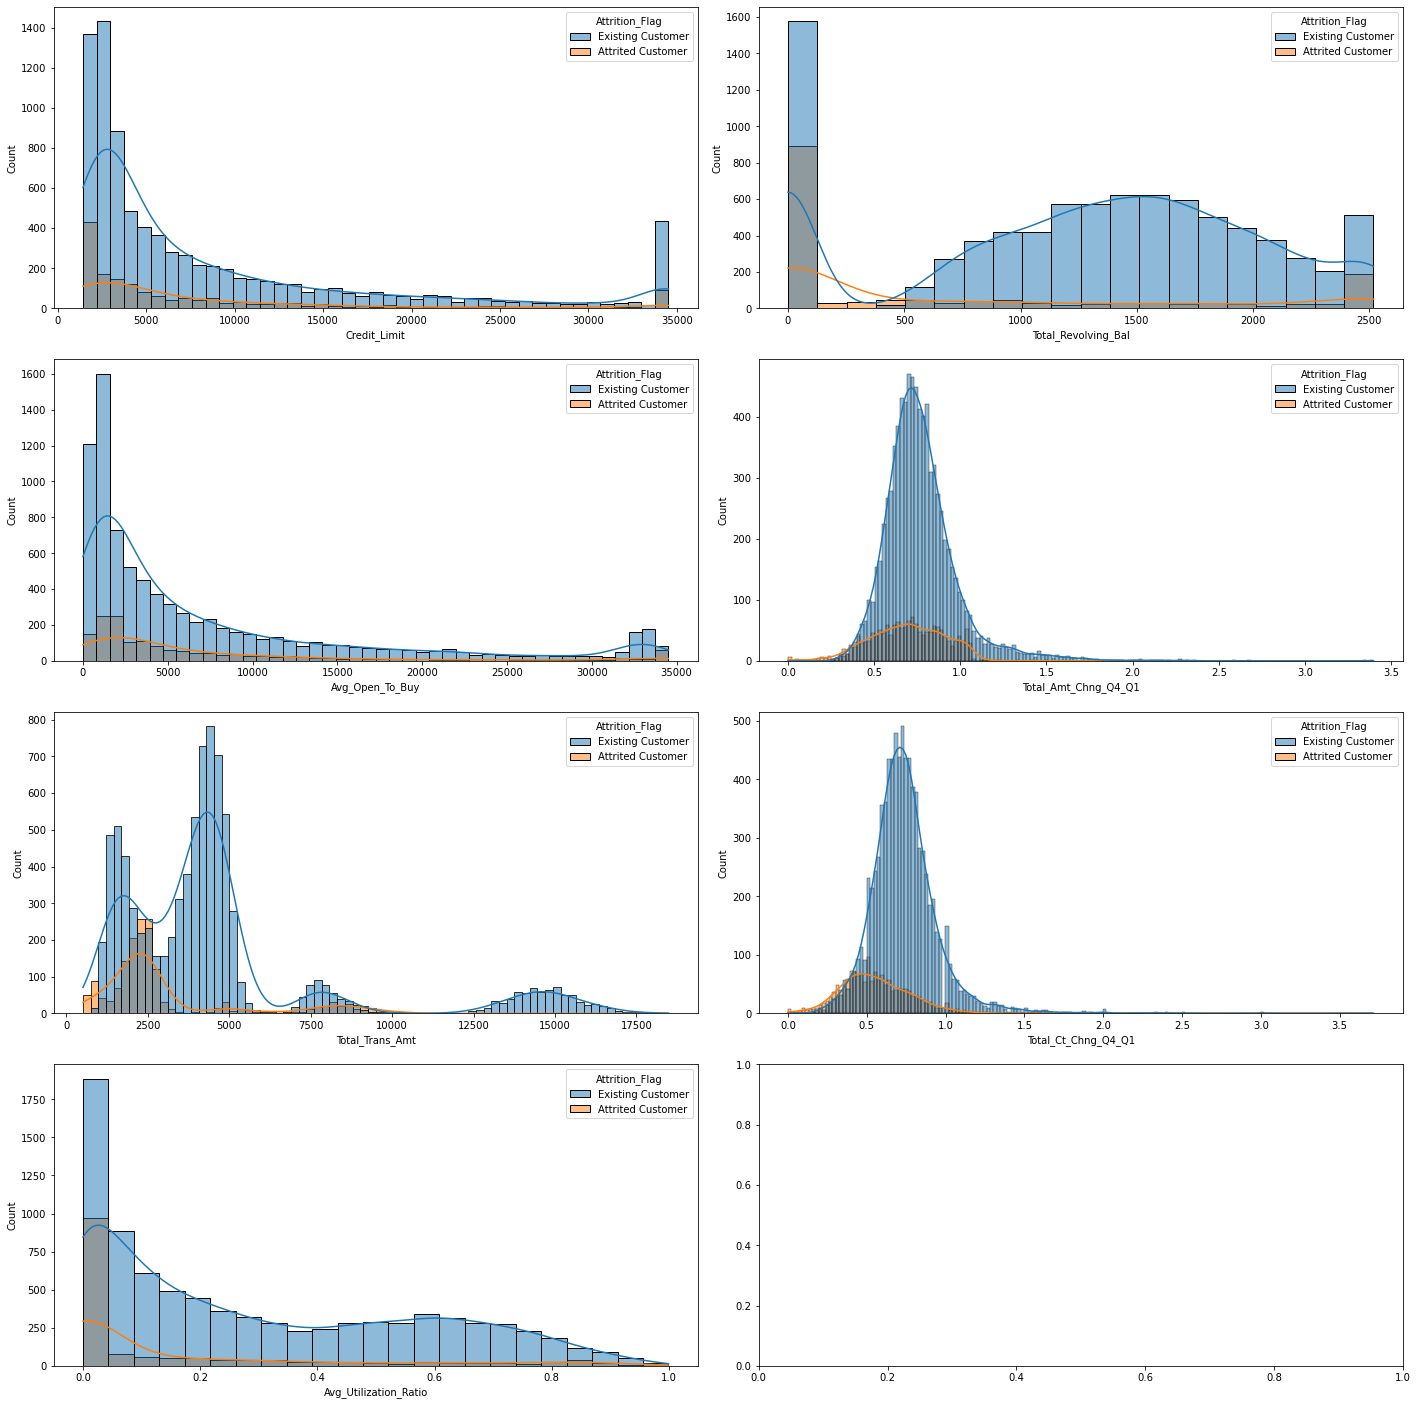

In [9]:
# Continuos Variables - histograms to understand distributions
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Credit_Limit',ax=axes[0][0], kde=True)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Revolving_Bal',ax=axes[0][1], kde=True)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Avg_Open_To_Buy',ax=axes[1][0], kde=True)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Amt_Chng_Q4_Q1',ax=axes[1][1], kde=True)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Trans_Amt',ax=axes[2][0], kde=True)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Ct_Chng_Q4_Q1',ax=axes[2][1], kde=True)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Avg_Utilization_Ratio',ax=axes[3][0], kde=True)

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

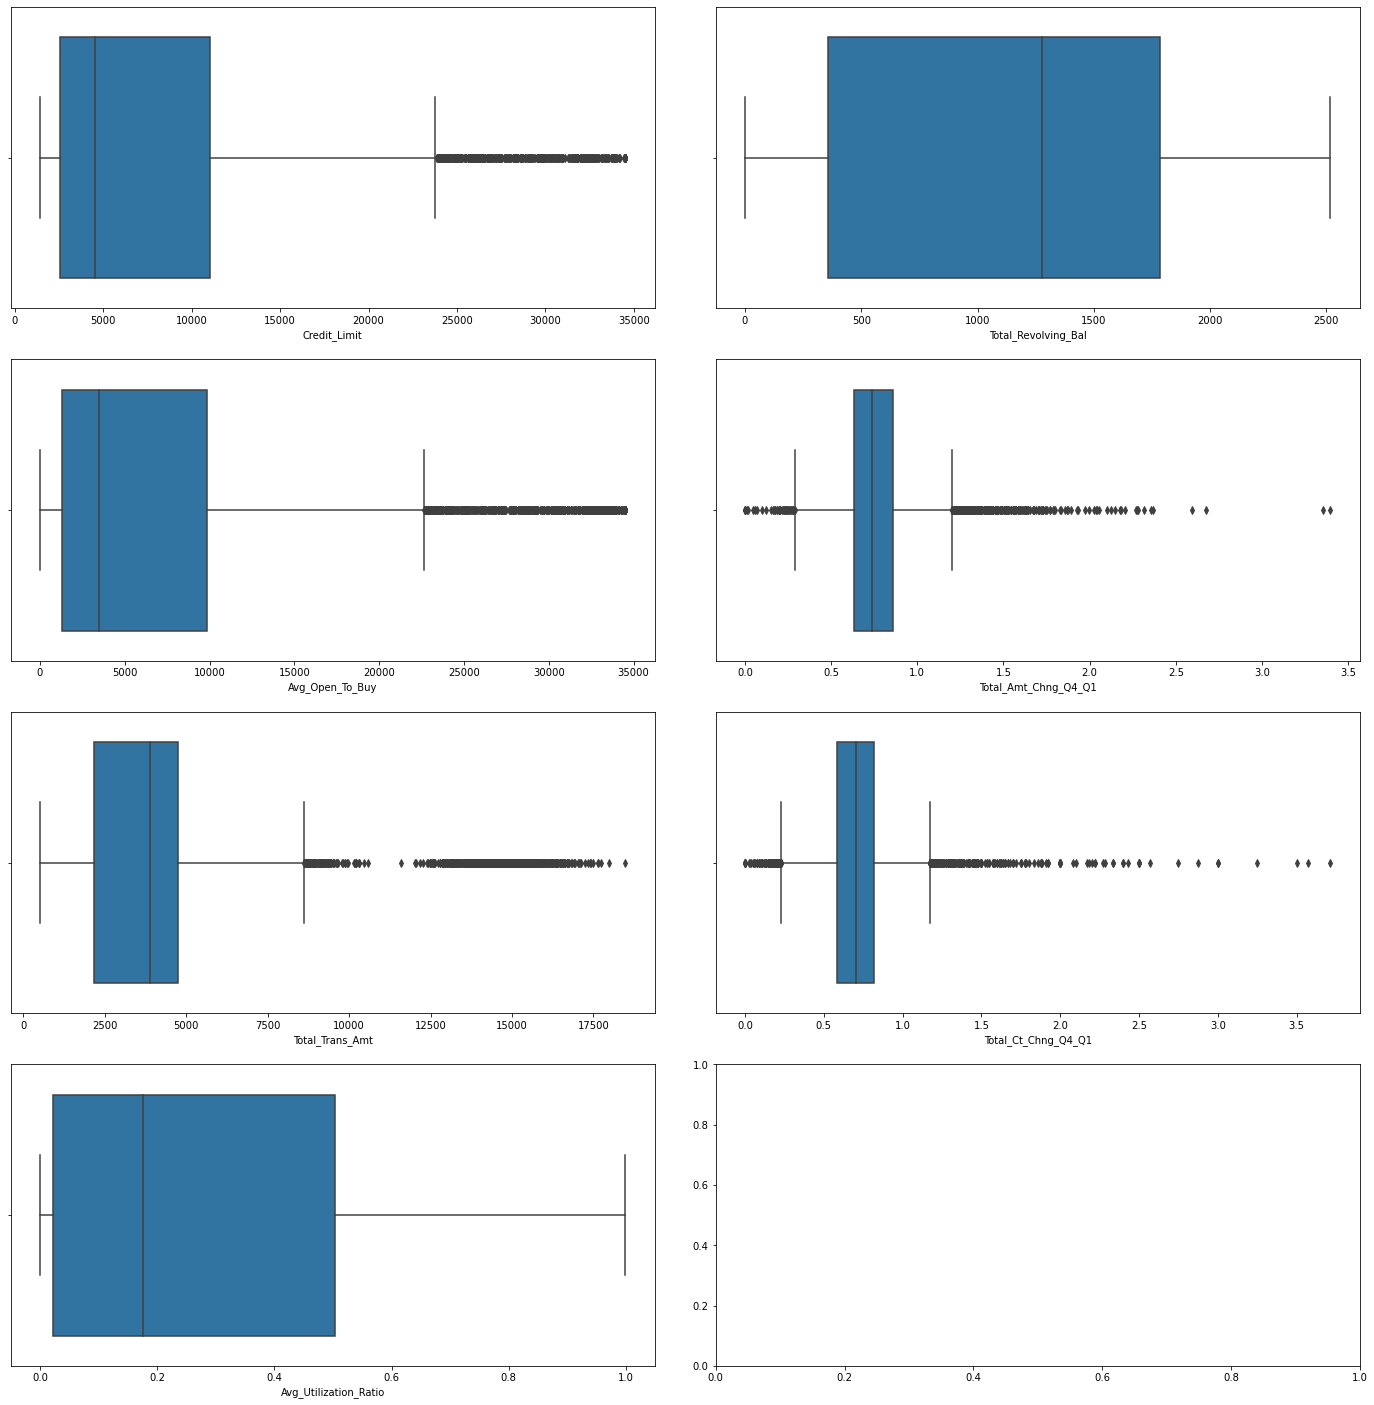

In [10]:
# Continuos Variables - histograms to understand distributions
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=bank_customers_df, x='Credit_Limit',ax=axes[0][0])
sns.boxplot(data=bank_customers_df, x='Total_Revolving_Bal',ax=axes[0][1])
sns.boxplot(data=bank_customers_df, x='Avg_Open_To_Buy',ax=axes[1][0])
sns.boxplot(data=bank_customers_df, x='Total_Amt_Chng_Q4_Q1',ax=axes[1][1])
sns.boxplot(data=bank_customers_df, x='Total_Trans_Amt',ax=axes[2][0])
sns.boxplot(data=bank_customers_df, x='Total_Ct_Chng_Q4_Q1',ax=axes[2][1])
sns.boxplot(data=bank_customers_df, x='Avg_Utilization_Ratio',ax=axes[3][0])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

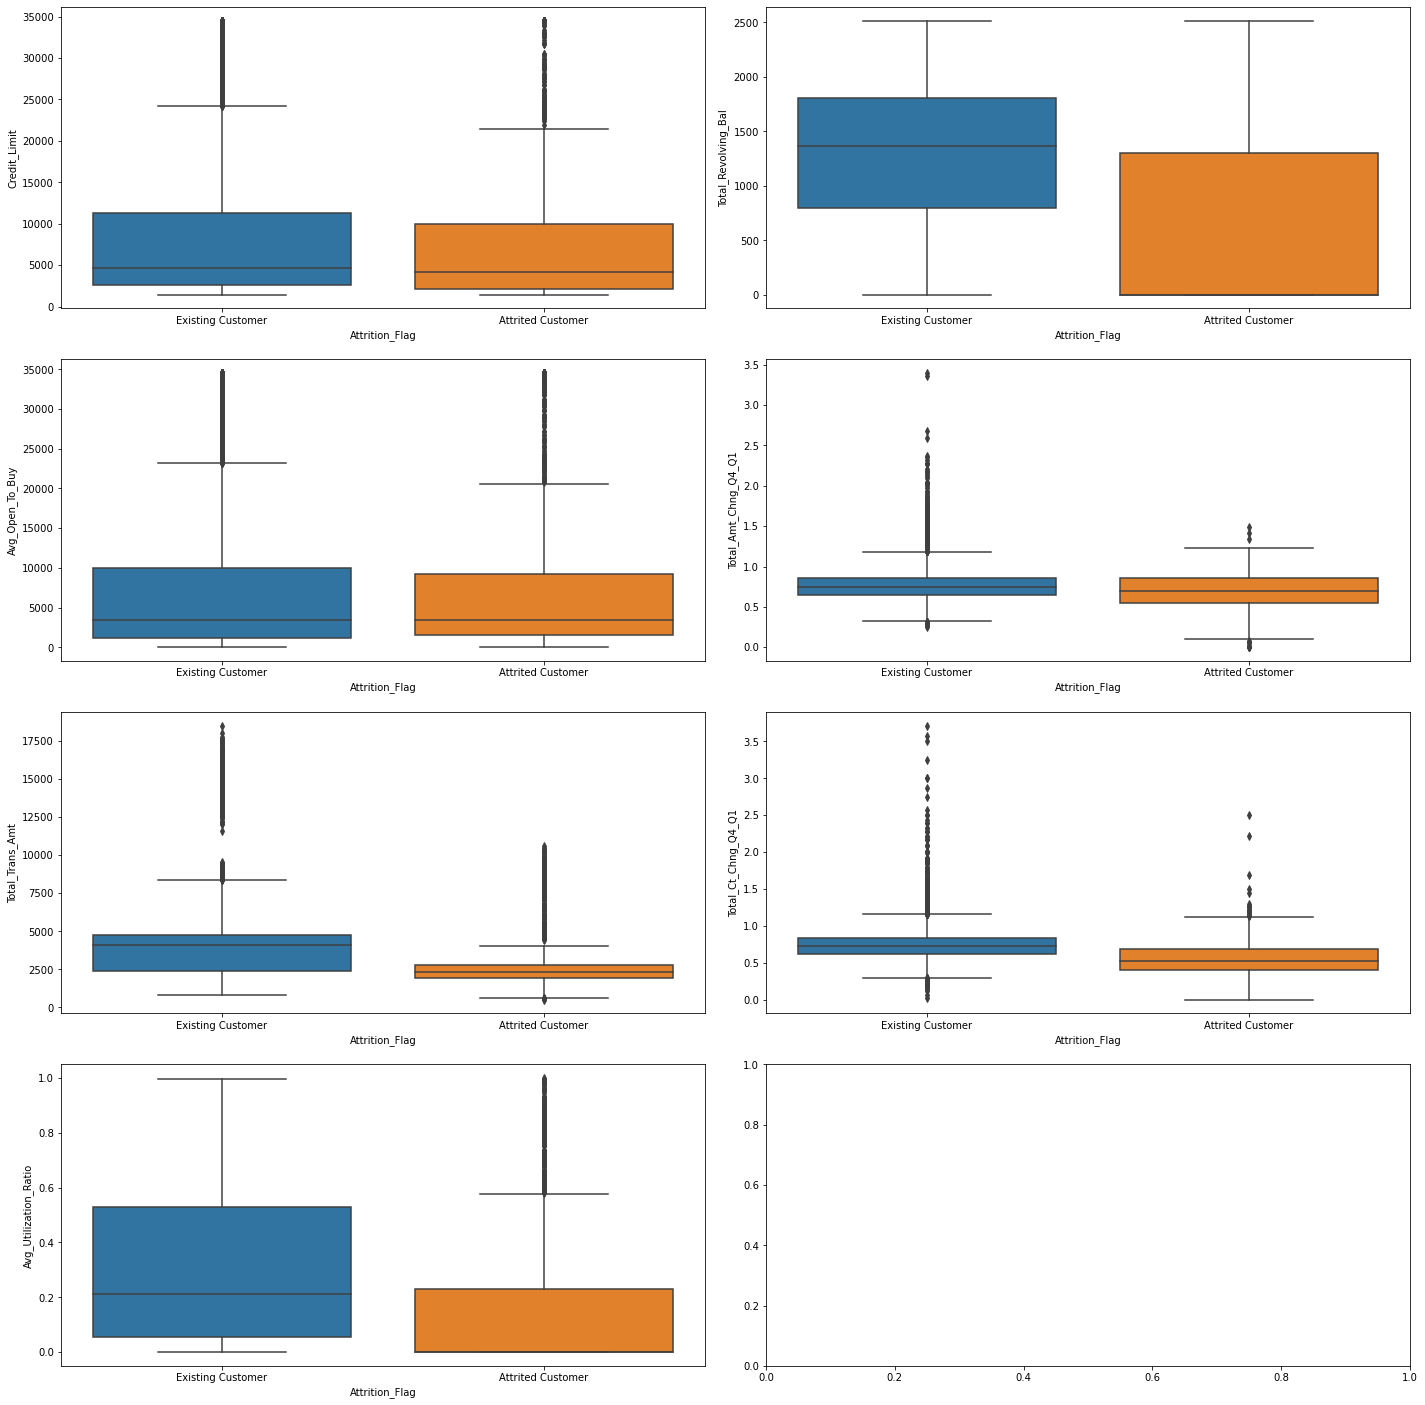

In [11]:
# Continuos Variables - histograms to understand distributions
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Credit_Limit',ax=axes[0][0])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Total_Revolving_Bal',ax=axes[0][1])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Avg_Open_To_Buy',ax=axes[1][0])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1',ax=axes[1][1])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Total_Trans_Amt',ax=axes[2][0])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1',ax=axes[2][1])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Avg_Utilization_Ratio',ax=axes[3][0])

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

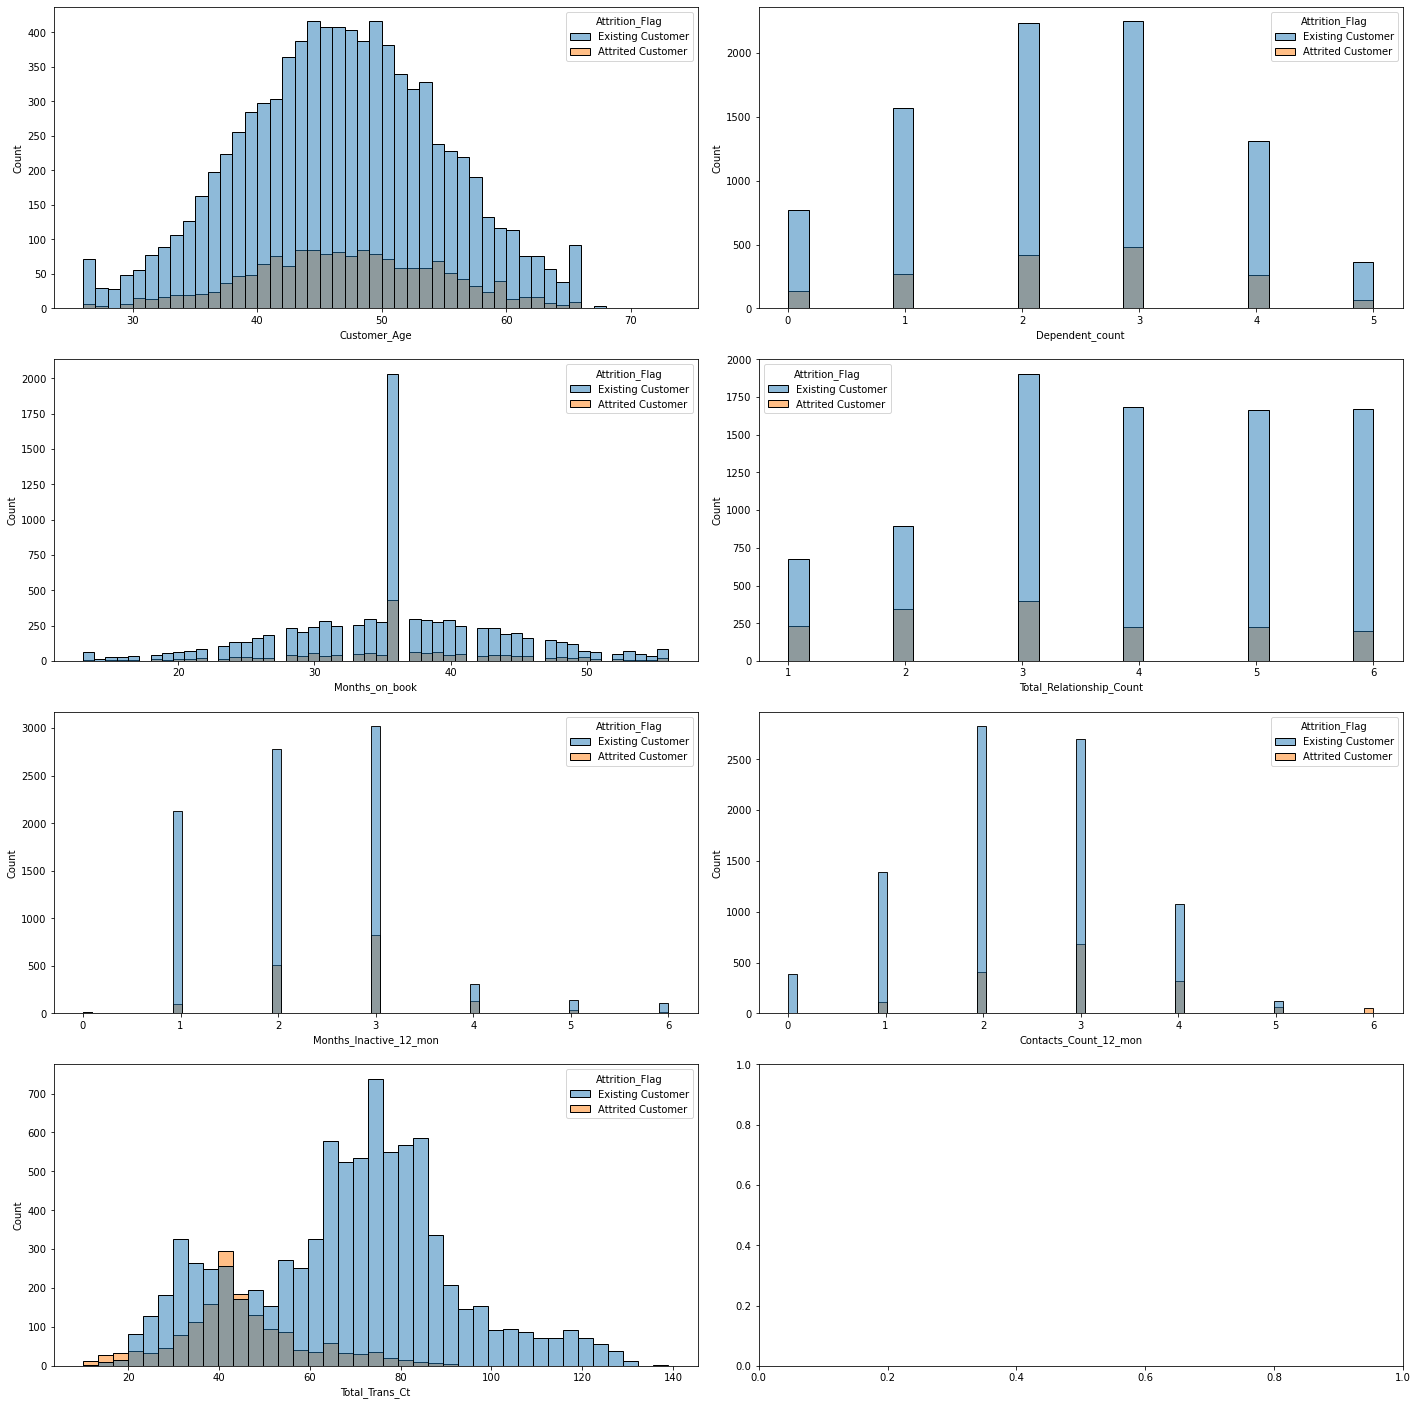

In [12]:
# Discrete Values - histograms to see how they are distributed
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Customer_Age',ax=axes[0][0])
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Dependent_count',ax=axes[0][1])
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Months_on_book',ax=axes[1][0])
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Relationship_Count',ax=axes[1][1])
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Months_Inactive_12_mon',ax=axes[2][0])
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Contacts_Count_12_mon',ax=axes[2][1])
sns.histplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Trans_Ct',ax=axes[3][0])

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='count'>

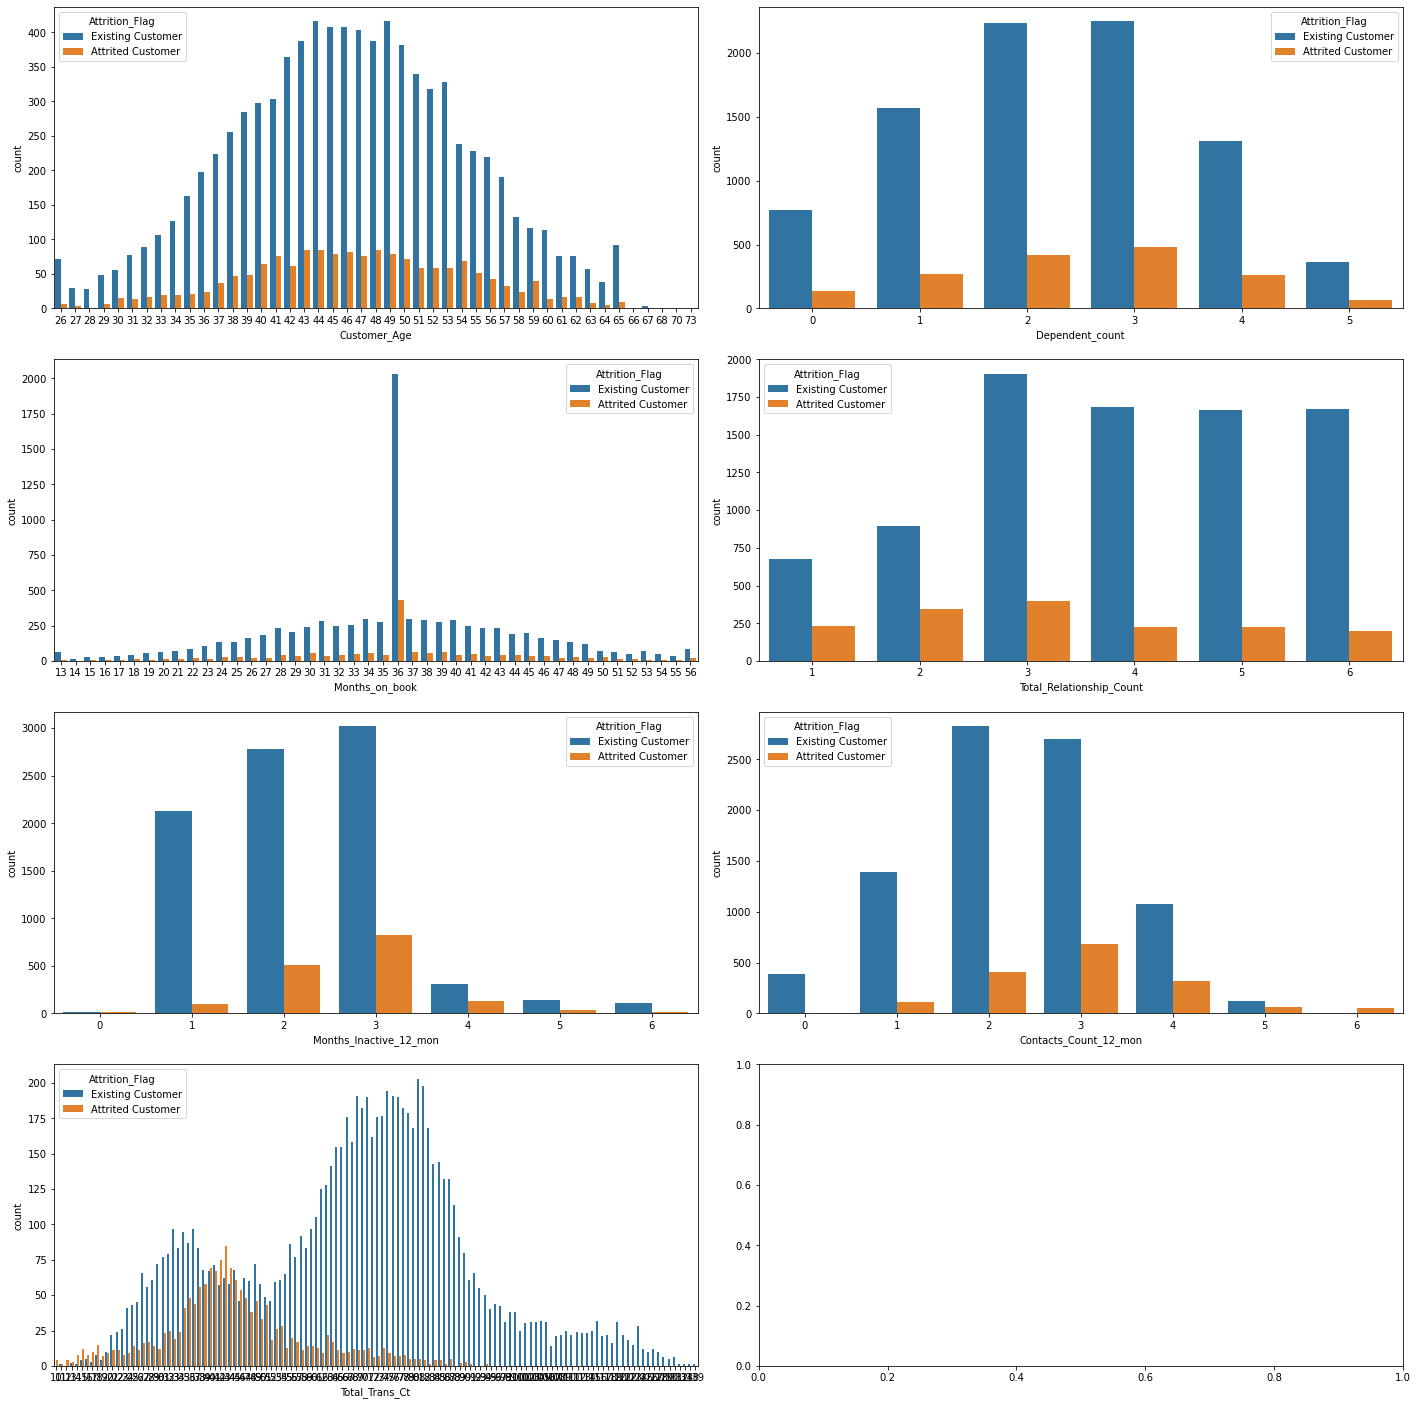

In [13]:
# Discrete Values - countplot to see how they are distributed at each individual values
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Customer_Age',ax=axes[0][0])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Dependent_count',ax=axes[0][1])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Months_on_book',ax=axes[1][0])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Relationship_Count',ax=axes[1][1])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Months_Inactive_12_mon',ax=axes[2][0])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Contacts_Count_12_mon',ax=axes[2][1])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Total_Trans_Ct',ax=axes[3][0])

<AxesSubplot:xlabel='Total_Trans_Ct'>

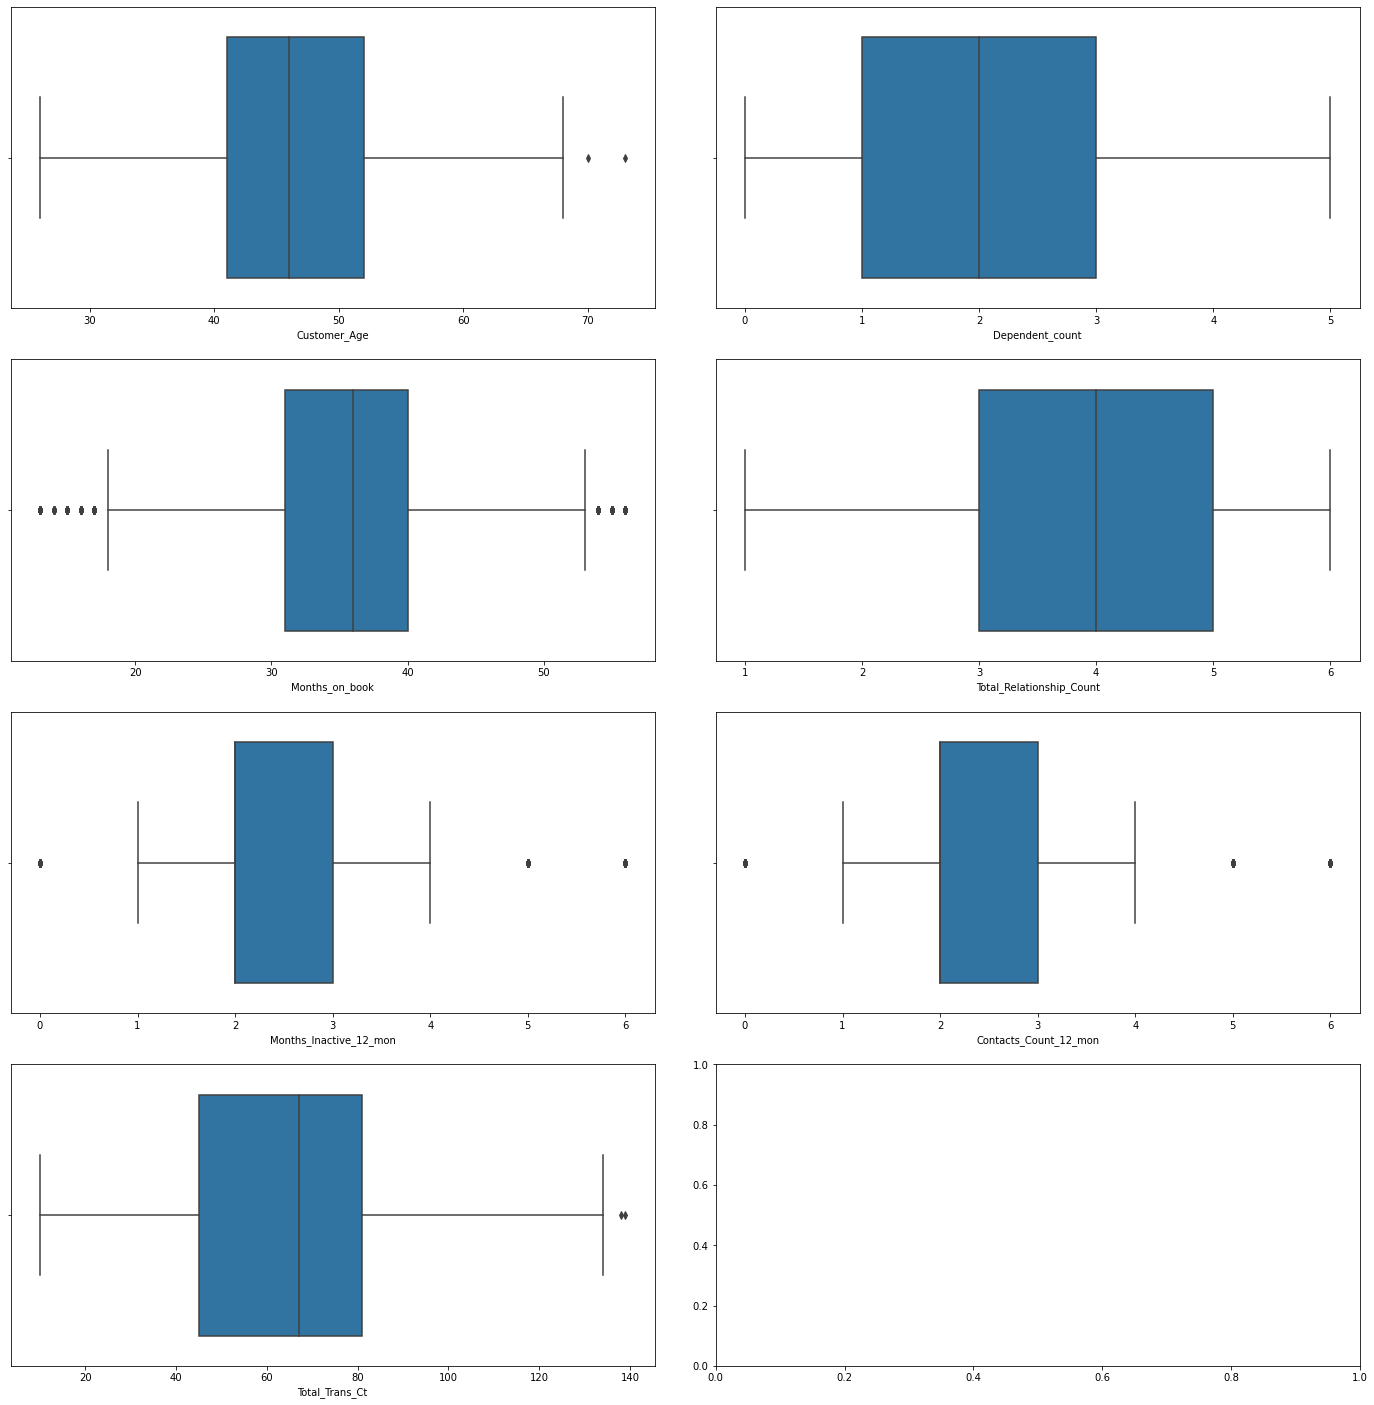

In [14]:
# Discrete Variables - boxplots to understand extreme values & outliers in relation to target values
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=bank_customers_df, x='Customer_Age',ax=axes[0][0])
sns.boxplot(data=bank_customers_df, x='Dependent_count',ax=axes[0][1])
sns.boxplot(data=bank_customers_df, x='Months_on_book',ax=axes[1][0])
sns.boxplot(data=bank_customers_df, x='Total_Relationship_Count',ax=axes[1][1])
sns.boxplot(data=bank_customers_df, x='Months_Inactive_12_mon',ax=axes[2][0])
sns.boxplot(data=bank_customers_df, x='Contacts_Count_12_mon',ax=axes[2][1])
sns.boxplot(data=bank_customers_df, x='Total_Trans_Ct',ax=axes[3][0])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

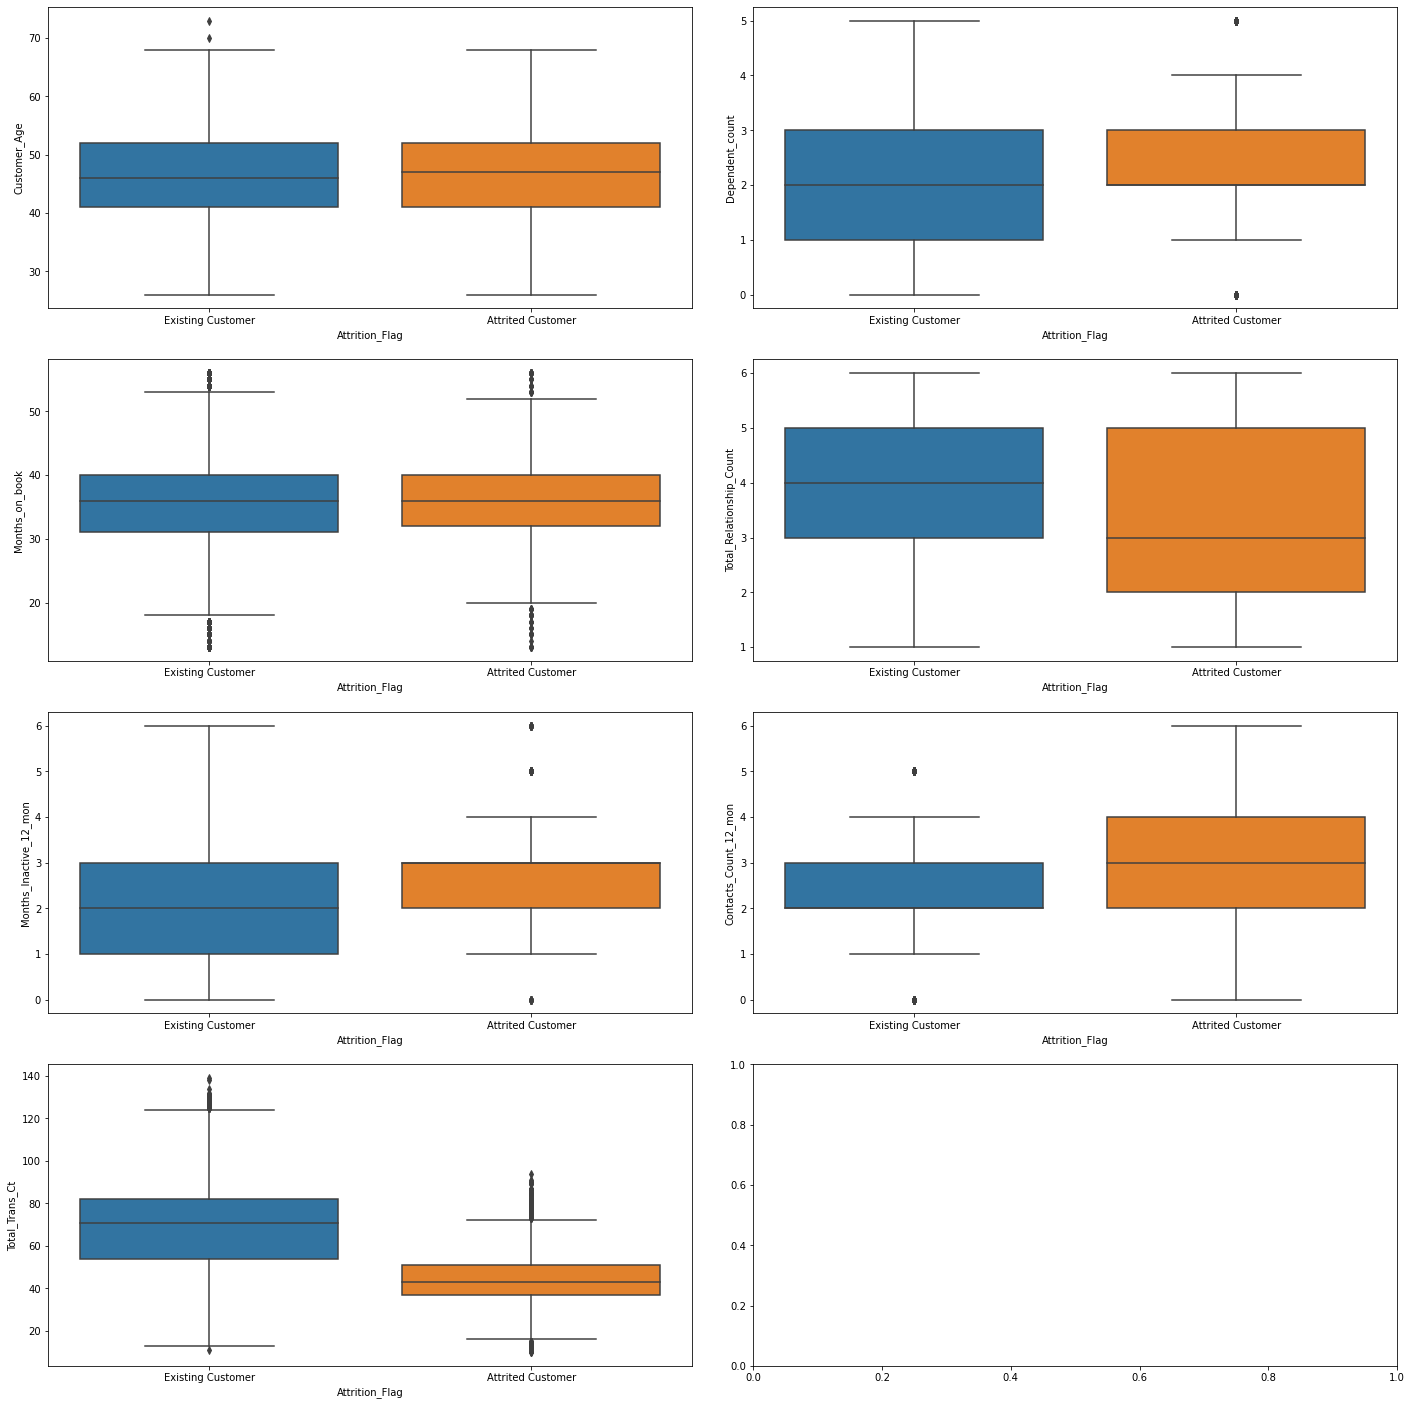

In [15]:
# Discrete Variables - boxplots to understand extreme values & outliers in relation to target values
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Customer_Age',ax=axes[0][0])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Dependent_count',ax=axes[0][1])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Months_on_book',ax=axes[1][0])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Total_Relationship_Count',ax=axes[1][1])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Months_Inactive_12_mon',ax=axes[2][0])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Contacts_Count_12_mon',ax=axes[2][1])
sns.boxplot(data=bank_customers_df, x='Attrition_Flag', y='Total_Trans_Ct',ax=axes[3][0])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

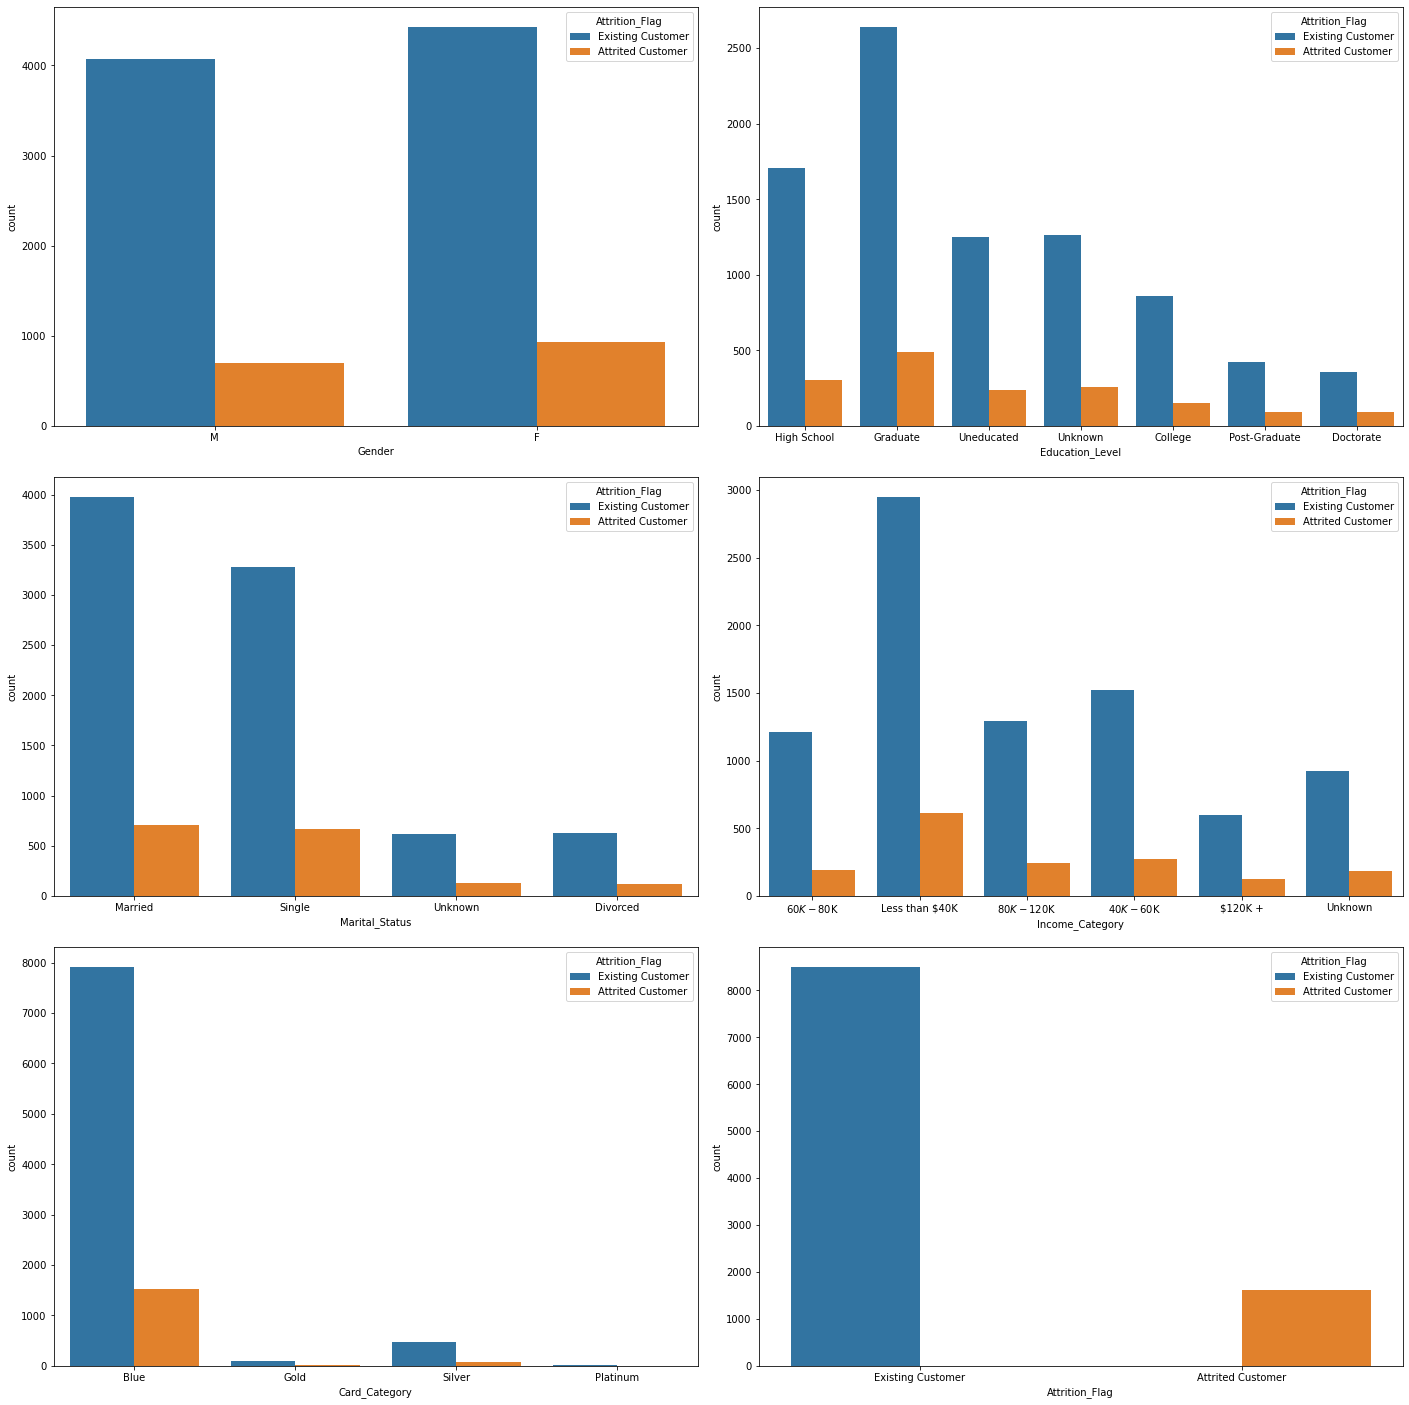

In [16]:
# Categroical Values - countplot to see how they are distributed at each individual values
fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Gender',ax=axes[0][0])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Education_Level',ax=axes[0][1])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Marital_Status',ax=axes[1][0])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Income_Category',ax=axes[1][1])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Card_Category',ax=axes[2][0])
sns.countplot(data=bank_customers_df, hue='Attrition_Flag', x='Attrition_Flag',ax=axes[2][1])

# Multivariate Analysis

We see high attrition in Blue card category customers but we do have the highest number of customers in that card category so it would be valuable to see how these customers are spread across other variables (continous & discrete). The goal is to understand per card category distribution of existing vs churned customers with respect to other parameters.

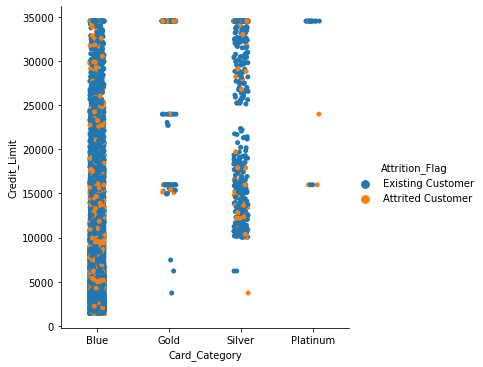

In [17]:
# We see high attrition in Blue Card Category Customers - so let's see how does it affects result when combined with other discrete or continous values
sns.catplot(data=bank_customers_df, x='Card_Category', y='Credit_Limit', hue='Attrition_Flag')

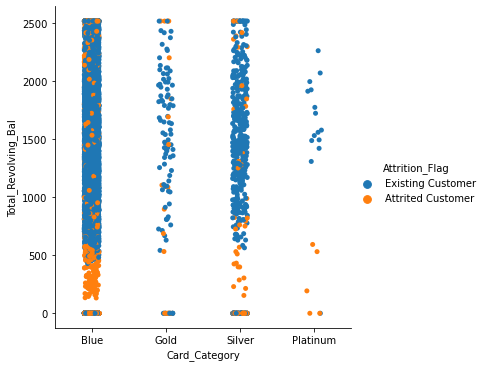

In [18]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag')

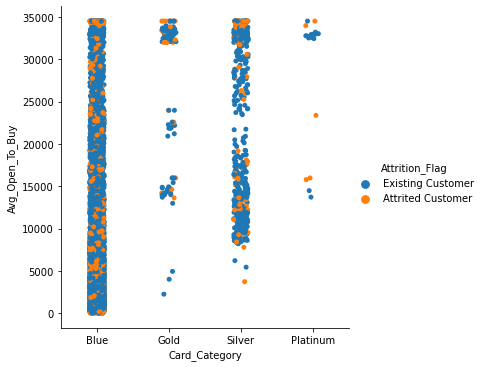

In [19]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Avg_Open_To_Buy', hue='Attrition_Flag')

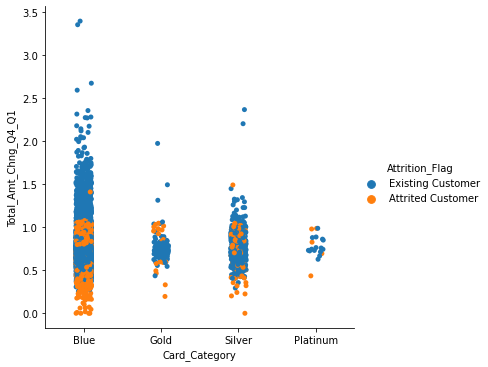

In [20]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag')

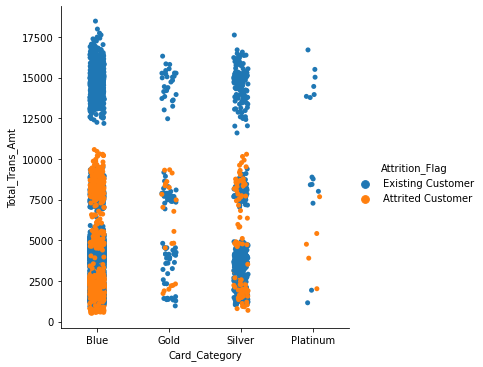

In [21]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Total_Trans_Amt', hue='Attrition_Flag')

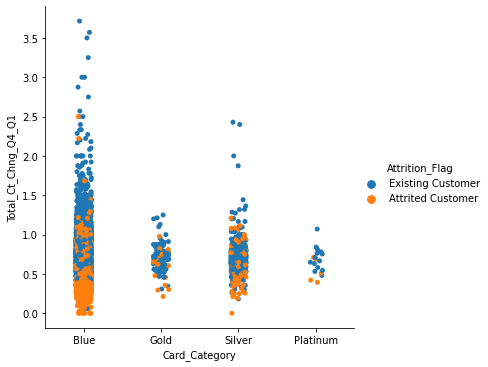

In [22]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')

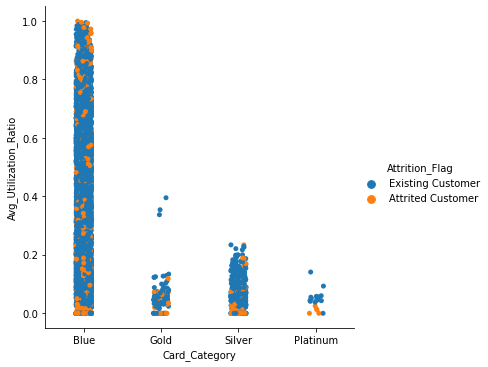

In [23]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Avg_Utilization_Ratio', hue='Attrition_Flag')

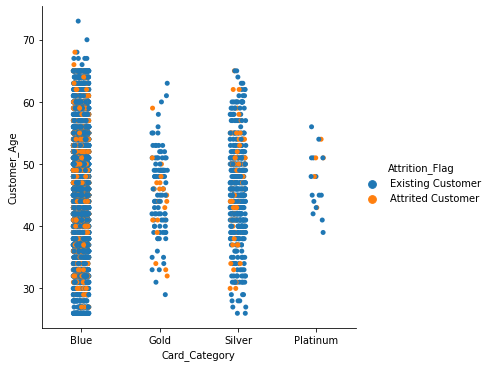

In [24]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Customer_Age', hue='Attrition_Flag')

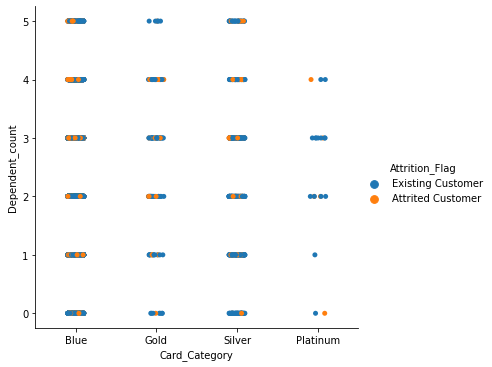

In [25]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Dependent_count', hue='Attrition_Flag')

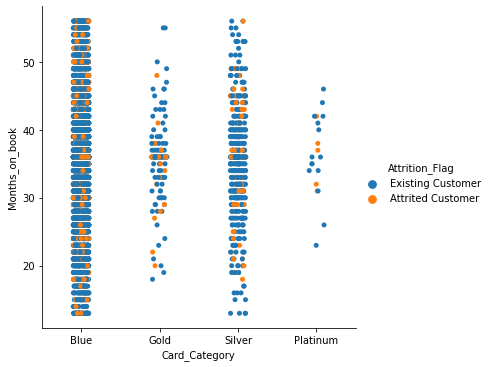

In [26]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Months_on_book', hue='Attrition_Flag')

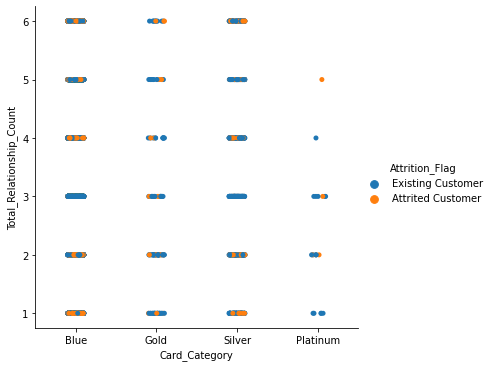

In [27]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Total_Relationship_Count', hue='Attrition_Flag')

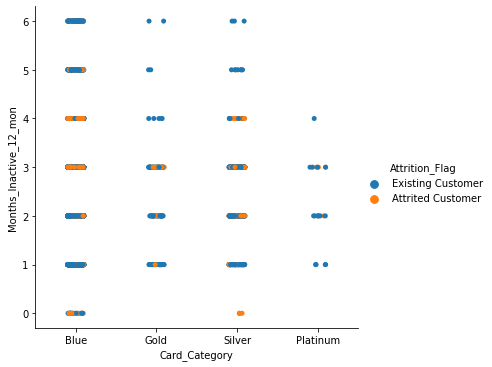

In [28]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Months_Inactive_12_mon', hue='Attrition_Flag')

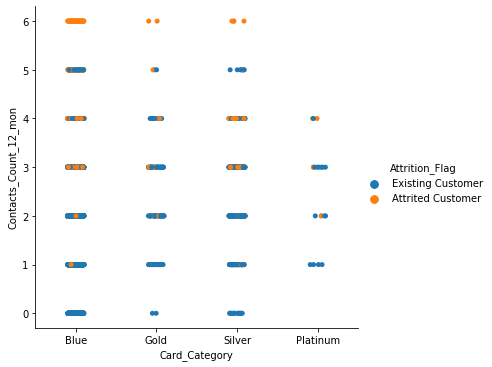

In [29]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Contacts_Count_12_mon', hue='Attrition_Flag')

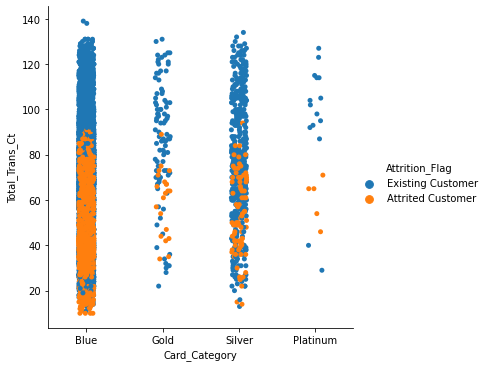

In [30]:
sns.catplot(data=bank_customers_df, x='Card_Category', y='Total_Trans_Ct', hue='Attrition_Flag')

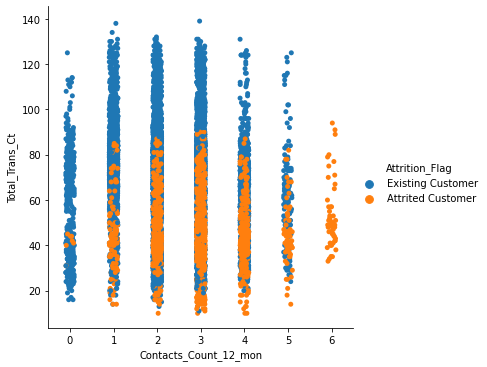

In [31]:
sns.catplot(data=bank_customers_df, x='Contacts_Count_12_mon', y='Total_Trans_Ct', hue='Attrition_Flag')

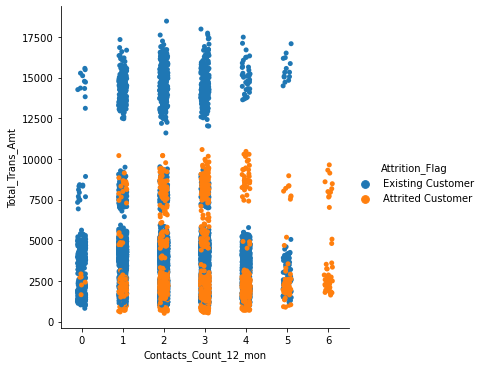

In [32]:
sns.catplot(data=bank_customers_df, x='Contacts_Count_12_mon', y='Total_Trans_Amt', hue='Attrition_Flag')

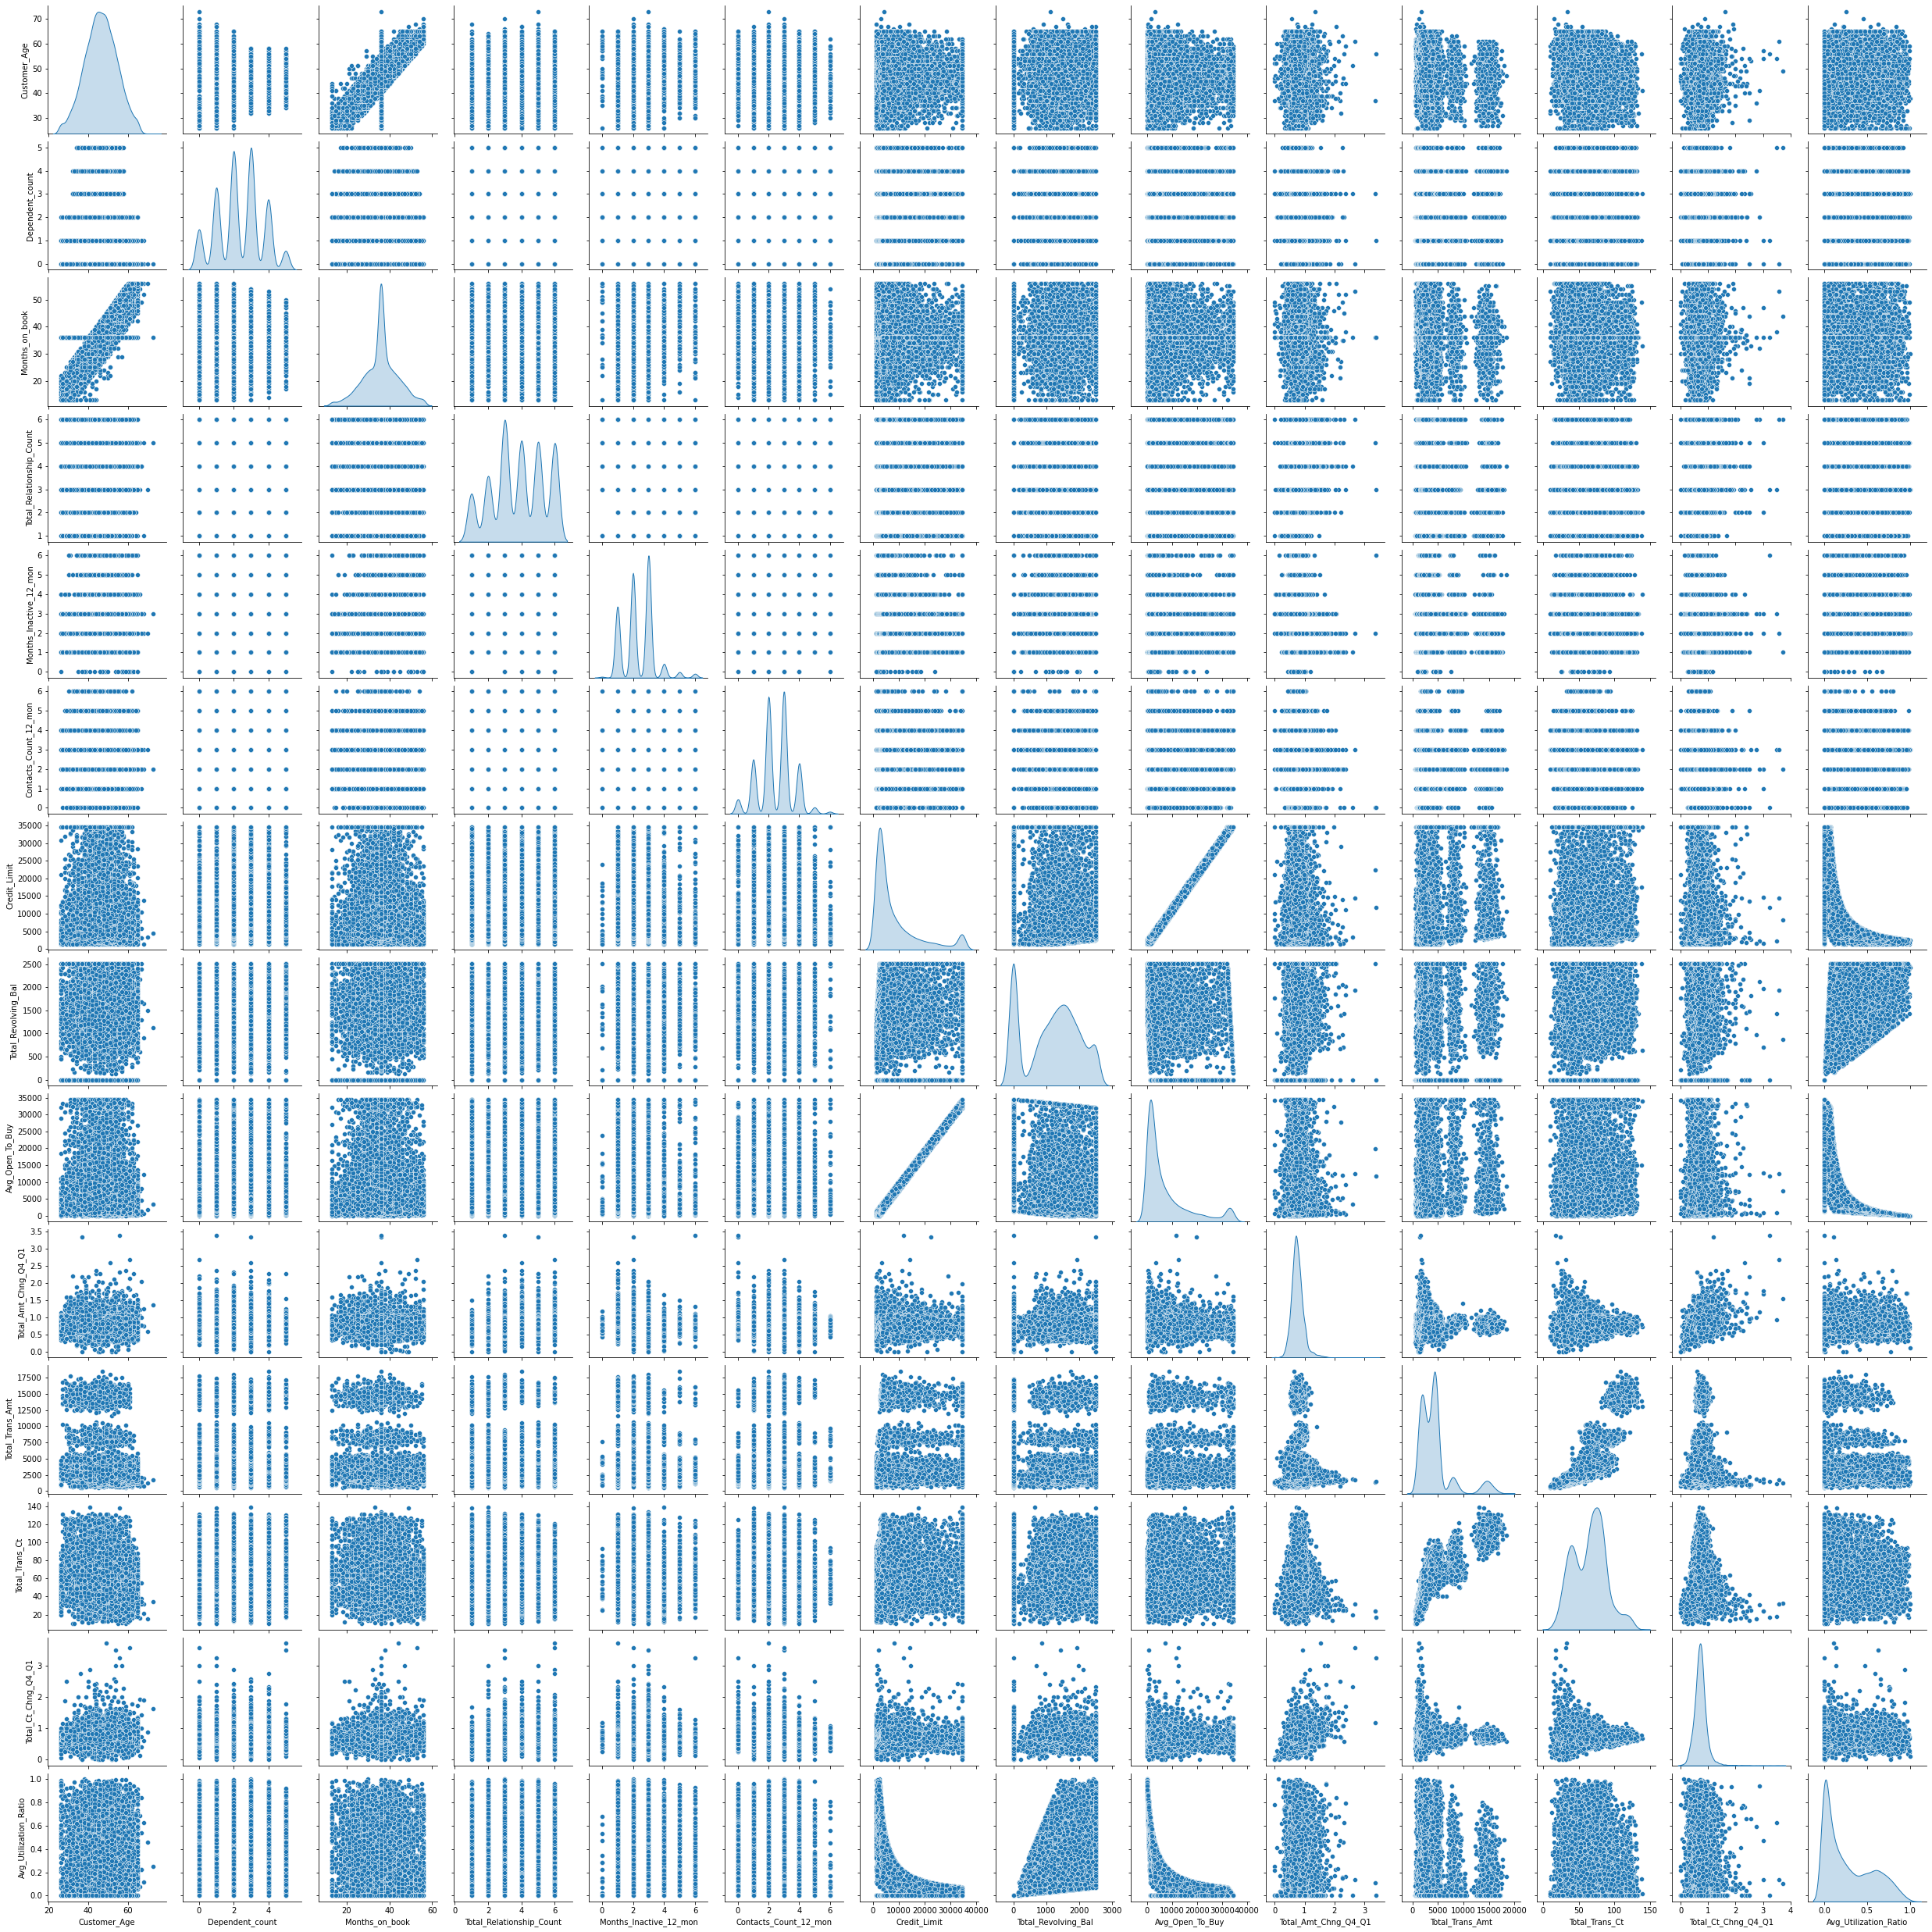

In [33]:
sns.pairplot(data=bank_customers_df,diag_kind='kde')

In [34]:
bank_customers_df.corr()

Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Total_Ct_Chng_Q4_Q1          -0.012143         0.011087       -0.014072   
Avg_Utilization_Ratio         0.007114        -0.037135       -0.007541   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   
Contacts_Count_12_mon                     0.055203                0.029493   
Credit_Limit                             -0.071386               -0.020394   
Total_Revolving_Bal                       0.013726               -0.042210   
Avg_Open_To_Buy                          -0.072601               -0.016605   
Total_Amt_Chng_Q4_Q1                      0.050119               -0.032247   
Total_Trans_Amt                          -0.347229               -0.036982   
Total_Trans_Ct                           -0.241891               -0.042787   
Total_Ct_Chng_Q4_Q1                       0.040831               -0.038989   
Avg_Utilization_Ratio                     0.067663               -0.007503   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                          -0.018452      0.002476   
Dependent_count                       -0.040505      0.068065   
Months_on_book                        -0.010774      0.007507   
Total_Relationship_Count               0.055203     -0.071386   
Months_Inactive_12_mon                 0.029493     -0.020394   
Contacts_Count_12_mon                  1.000000      0.020817   
Credit_Limit                           0.020817      1.000000   
Total_Revolving_Bal                   -0.053913      0.042493   
Avg_Open_To_Buy                        0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                  -0.024445      0.012813   
Total_Trans_Amt                       -0.112774      0.171730   
Total_Trans_Ct                        -0.152213      0.075927   
Total_Ct_Chng_Q4_Q1                   -0.094997     -0.002020   
Avg_Utilization_Ratio                 -0.055471     -0.482965   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                         0.014780         0.001151   
Dependent_count                     -0.002688         0.068291   
Months_on_book                       0.008623         0.006732   
Total_Relationship_Count             0.013726        -0.072601   
Months_Inactive_12_mon              -0.042210        -0.016605   
Contacts_Count_12_mon               -0.053913         0.025646   
Credit_Limit                         0.042493         0.995981   
Total_Revolving_Bal                  1.000000        -0.047167   
Avg_Open_To_Buy                     -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1                 0.058174         0.007595   
Total_Trans_Amt            

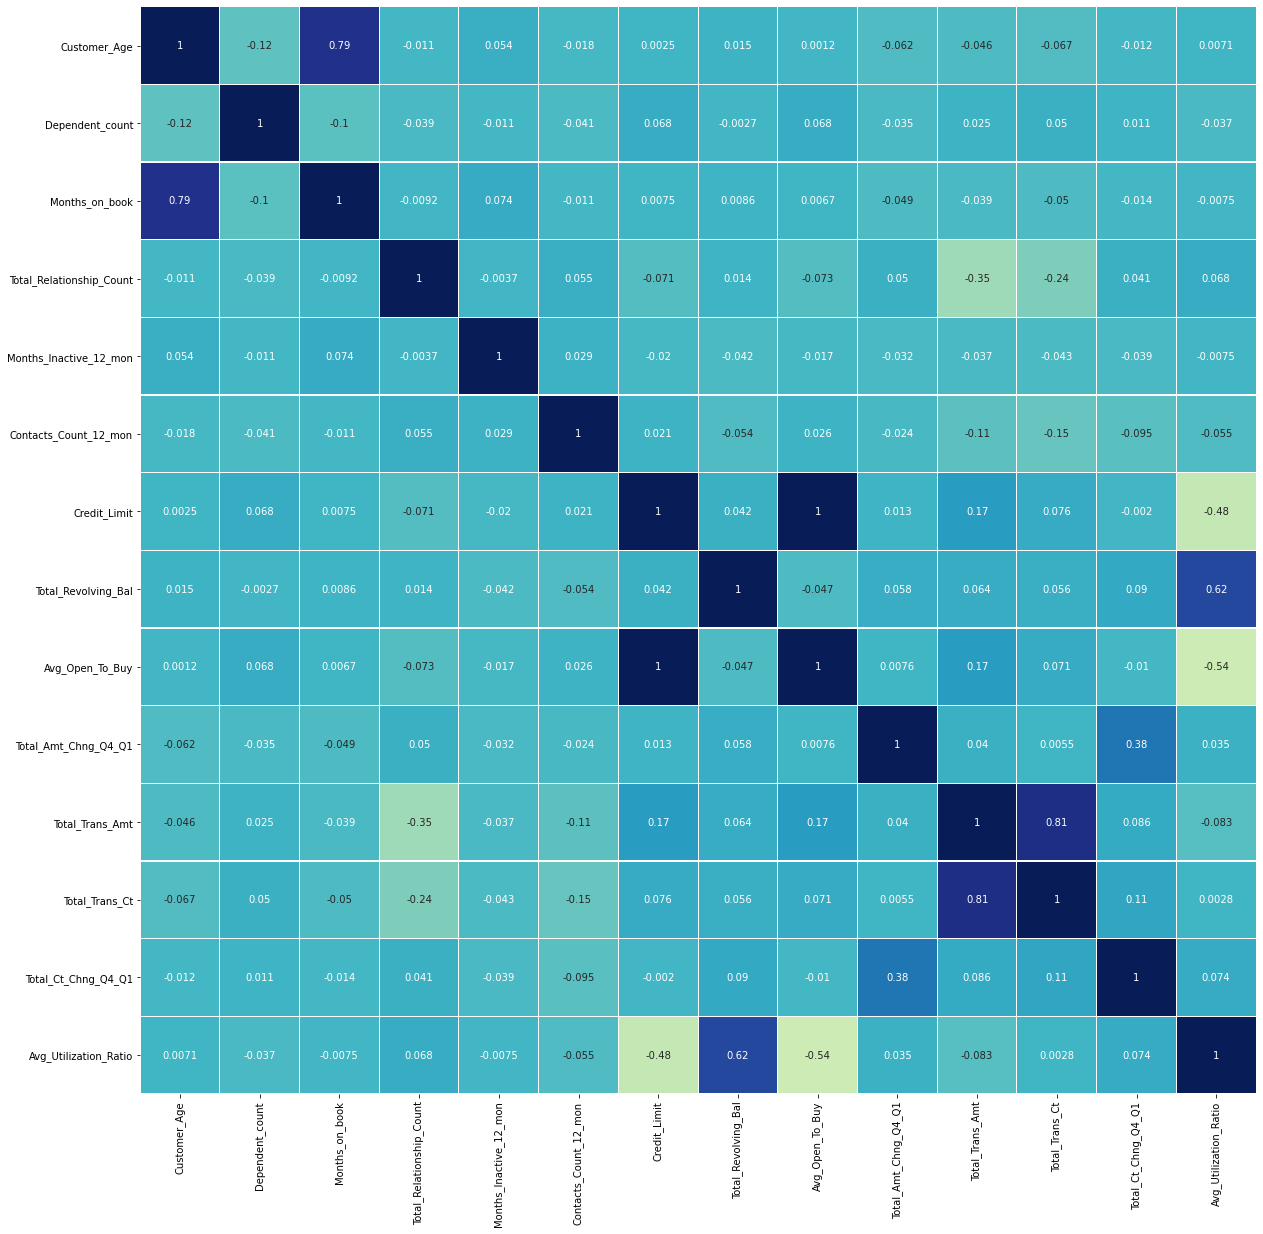

In [35]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(bank_customers_df.corr(),
            annot=True,
            linewidths=.1,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            ax=ax)
plt.show()

# Illustrate the insights based on EDA: Key meaningful observations on the relationship between variables (5 points)

## How is our data distributed in terms of target variable?
We have imbalanced dataset - i.e. we have more examples of non churned customers vs churned customers. However looking at the visualizations above we can identify some key characteristics of churned customers.

## What is the quality of data
* We have a very clean dataset (no missing values etc.) although we do have quite a bit of dimensions and we also have a high number of categorical datapoints.
* In addition to this we do have large variation in terms of scales of various continuous/discrete variables. Algorithms such as KNN Classification requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes.
* We do see imbalance in categorical values as well which means that we have more examples of certain categorical variables (in some cases 3 to 4 times) but I guess that is the nature of our population and as such we can't do much about it.
* Most of the distributions of continuous varaibles are right skewed which means that most of the values are less than the average
* There are great number of outliers in all columns except for ```Avg_Utilization_Ratio``` and ```Total_Revolving_Bal```.
* In discrete values we don't see a lot of outliers which can be mostly attributed to the almost bell shaped curve in most of the cases.

## What about 'Unknown' categorical datapoints?
We do see values where some of the categorical attributes about the customers are unknowns but when looking at their distribution across churned vs non churned customers we don't see much differences with respect to other categories in terms of proportion - this means that they are part of the customer behavior and can be treated as individual categories as such. Also treating them (for example imputing values using techniques like median values) might introduce defects in the dataset that might affect the model performance (we will see model assign higher weights to those categories incorrectly).

### How do these 'Unknown' categorical values impact us?
While we can encode the categorical values to ordinal values in cases where we see sequential values like Education Level and Income but in other cases this is not straight forward - for example in case or marital status. But having these categorical values would lead to ```curse of dimensionality``` (because each unknown) would add 1 more column to our dataset when one-hot encoding these values in our dataset that is already quite wide. We can mitigate this by using the below techniques:
* Dropping one of the two highly correlated variables (see below) - we do have 6 medium to high correlation pairs and if we drop one of variables from these pairs we would have gotton rid of 3 dimensions.
* Replacing the Unknown values with most common values and then encoding the sequential categorical values with Ordinal values. As mentioned earlier this would add bias to that data and I would not like to take this approach.
* Using techniques like PCA to reduce the dimensions so that we have a distilled version of the data that can be used to fit the model.
* Using regularization to control weights of the features so that we are able to control overfitting/complex models.

## How are independent variables correlated
Most of the data is not strongly correlated except for a few data points which are listed below:

**Positive Correlation:**
* ```Months_on_book``` and ```Customer_Age``` are strongly positively correlated (0.79) which is understandable because higher the age the more time the customer had to be with the bank.
* ```Avg_Open_To_Buy``` and ```Credit_Limit``` are perfectly correlated to each other (positive 1) which can be explained by the fact that higher credit limits imply more remaing amount to buy. Even when customer spends out of their credit limit - the value ```Avg_Open_To_Buy``` is a derivative of ```Credit_Limit```.
* ```Total_Revolving_Bal``` and ```Avg_Utilization_Ratio``` also have a strong positive correlation (0.62) which can be explained by the fact that those have high utilization ratio will have higher unpaid balances.
* ```Total_Trans_Amt``` and ```Total_Trans_Ct``` have a very strong positive correlation (0.81) which is because Total transaction amounts would be higher if there are more transactions - please note that it is not perfectly correlated (hence a value less than 1) because some customers might make few very costly purchases which would lead to a low transaction count but high transaction amounts.

**Negative Correlation:**
* We have a mild negative correlation between ```Avg_Utilization_Ratio``` and ```Credit_Limit```, this is because Average utilization ratio is inversly affected by credit limit because if the credit limit is low, the utilization ratio will be higher as it is defined as the part of credit limit which is utilized.
* ```Avg_Open_To_Buy``` and ```Avg_Utilization_Ratio``` are negatively correlated (-0.54) because you will have less amount remaining to spend as you utilize more of you credit limit.
* There is a very mild negative correlation between ```Total_Trans_Amt``` and ```Total_Relationship_Count``` which can be explained by the fact that customers with lesser products will have lower transaction amounts - this is not perfect but does affect the customer transactions.

# Customer Profile: Churned Customers

## What are we looking for?
We would like to minimize the customer attrition/churn and hence we would like to build a profile of those customers who have higher probability of churning.

## What are the signals in the data that indicate churn?
* Customers with lower transaction amounts tend to churn away.
* Customers who tend to churn have 0.5 change in the transaction count in Q4 over Q1.
* Customers with no utilization tend to churn more often
* Most of the customers who churn have total transaction amounts less than 3000.
* We see similar distribution of customers churned vs continuing customers in terms of age.
* Lower number of transactions are correlated with customer churn
* Most of the churned customers have 2 or more dependents.
* Customers who have higher number of contact tend to churn which might indicate dissatisfaction from services or offerings.

**In a nutshell we can say that customer churn is related to the customers usage of the card. Also we can say that when a customer has to contact the bank multiple times to resolve issues it negatively affects their prospect of staying with the bank**

# Data Pre-processing: Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling (5 points)

In this section we will get the dataset ready for model building, we will perform some common transformations to the data so that we have a dataset that is ready for model building, we will also use some feature engineering techniques like regularization etc. to be able to improve model performance.

**Because we are looking for a model that that is able to predict customer churn - we will treat the ```Attrited Customer``` as the positive class and ```Existing Customer``` as the negative class.**

## Steps:
1. Convert the ```Attrited Customer``` value to 1 and ```Existing Customer``` value to 0.
2. Missing value treatment: There are no missing values as such but we do have ```Unknown``` values (and they can be very well considred part of the customer behavior) but we will still experiment with using the Ordinal encoding for sequantial data like Education and Income Categories and then use KNN Imputer to impute ```Unknown``` values, this might help us in eliminating some of the dimensions - we will compare the results with and without this step.
3. We do see outliers in several columns and we can cap the min and max values or we can use RobustScaler which is part of the sklearn preprocessing modules to help deal with outliers while scaling the data. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). **We need to be careful to not leak the scaling information to the test dataset - so we will fit the RobustScaler only on training data and add it pipeline to use the RobustScaler which is fit only on the training data to transform while predicting against test data. We need to ensure that RobustScaler never sees the test data.**
4. We will also create copies of the dataset where 1 of the two heavily correlated features would have been dropped (correlation threhold +-0.5).
5. One Hot Encoding the Categorical Values like Gender & Card Category

In [36]:
# encode the target variable in a new dataframe 
# (keep the original one as is to be able to refer and create other mutations)
bank_customers_preprocessed_df = bank_customers_df.copy()
# map the Attrition_Flag values
bank_customers_preprocessed_df['Churned_Customer']=bank_customers_preprocessed_df.Attrition_Flag.map({'Attrited Customer': 1, 'Existing Customer':0})

bank_customers_preprocessed_df.drop(['Attrition_Flag'], axis=1, inplace=True)
bank_customers_preprocessed_df.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School        Unknown   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Churned_Customer  
0                  0.061                 0  
1                  0.105                 0  
2                  0.000                 0  
3                  0.760                 0  
4                  0.000                 0

In [37]:
bank_customers_preprocessed_imputed_df = bank_customers_preprocessed_df.copy()
knn_imputer = KNNImputer(n_neighbors=2)
bank_customers_preprocessed_imputed_df['Education_Map'] = bank_customers_preprocessed_df.Education_Level.map({'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6, 'Unknown': np.nan})
bank_customers_preprocessed_imputed_df['Income_Map'] = bank_customers_preprocessed_df.Income_Category.map({'Less than $40K': 1, '$40K - $60K': 2, '80K - $120K': 3, '$60K - $80K': 4, '$120K +': 5, 'Unknown': np.nan})
bank_customers_preprocessed_imputed_df.drop(['Education_Level', 'Income_Category'], axis=1, inplace=True)

bank_customers_preprocessed_imputed_df['Education_Map'] = knn_imputer.fit_transform(bank_customers_preprocessed_imputed_df[['Education_Map']])
bank_customers_preprocessed_imputed_df['Income_Map'] = knn_imputer.fit_transform(bank_customers_preprocessed_imputed_df[['Income_Map']])
bank_customers_preprocessed_imputed_df.head()

Customer_Age Gender  Dependent_count Marital_Status Card_Category  \
0            45      M                3        Married          Blue   
1            49      F                5         Single          Blue   
2            51      M                3        Married          Blue   
3            40      F                4        Unknown          Blue   
4            40      M                3        Married          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Churned_Customer  Education_Map  Income_Map  
0                  0.061                 0            1.0    4.000000  
1                  0.105                 0            4.0    1.000000  
2                  0.000                 0            4.0    2.190374  
3                  0.760                 0            1.0    1.000000  
4                  0.000                 0            0.0    4.000000

<AxesSubplot:xlabel='Education_Map', ylabel='count'>

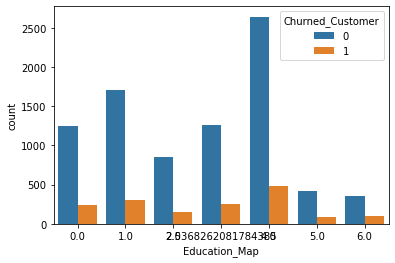

In [38]:
sns.countplot(data=bank_customers_preprocessed_imputed_df, hue='Churned_Customer', x='Education_Map')

<AxesSubplot:xlabel='Income_Map', ylabel='count'>

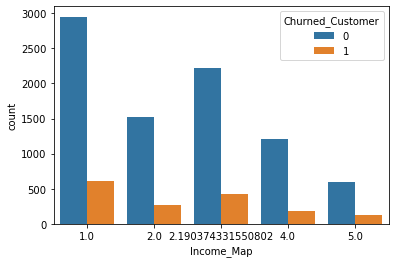

In [39]:
sns.countplot(data=bank_customers_preprocessed_imputed_df, hue='Churned_Customer', x='Income_Map')

## Imputation Results

I am not quite happy with the imputed values and here is why:
* Ideally I would have wanted the values to be discrete whereas the values imputed by the KNNImputer are continuous.
* Also if I had used a label encoder that would have resulted in creation of values that might affect the model in the sense there is no sequence where *'Unknown'* can fit.

We now have 2 versions of the dataframe and we can compare the performance of various models against both.

## Next steps:

### Drop one of the columns from the pair of columns where correlation is greater than +-0.5.
* Months_on_book & Customer_Age: Drop Months_on_book as there are outliers
* Avg_Open_To_Buy & Credit_Limit: Drop Avg_Open_To_Buy as Credit limit can be good predictor of churn - also Avg_Open_To_Buy is an average value which is derived from credit limit itself.
* Total_Revolving_Bal & Avg_Utilization_Ratio: Avg_Utilization_Ratio will be dropped.
* Total_Trans_Amt & Total_Trans_Ct: Total_Trans_Ct will be dropped.
* Avg_Utilization_Ratio & Avg_Open_To_Buy: Avg_Open_To_Buy will be dropped

So in-effect the following columns will be dropped:
- Months_on_book
- Avg_Open_To_Buy
- Avg_Utilization_Ratio
- Total_Trans_Ct

### One Hot Encode (OHE) the categorical columns
**In bank_customers_preprocessed_df:**
- Gender
- Education_Level
- Marital_Status
- Income_Category
- Card_Category

**In bank_customers_preprocessed_imputed_df:**
- Gender
- Marital_Status
- Card_Category

In [40]:
bank_customers_preprocessed_df.drop(['Months_on_book', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Trans_Ct'], axis = 1, inplace=True)
bank_customers_preprocessed_imputed_df.drop(['Months_on_book', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Trans_Ct'], axis = 1, inplace=True)

In [41]:
bank_customers_preprocessed_df['Gender']=bank_customers_preprocessed_df['Gender'].astype('category')
bank_customers_preprocessed_df['Education_Level']=bank_customers_preprocessed_df['Education_Level'].astype('category')
bank_customers_preprocessed_df['Marital_Status']=bank_customers_preprocessed_df['Marital_Status'].astype('category')
bank_customers_preprocessed_df['Income_Category']=bank_customers_preprocessed_df['Income_Category'].astype('category')
bank_customers_preprocessed_df['Card_Category']=bank_customers_preprocessed_df['Card_Category'].astype('category')

bank_customers_preprocessed_imputed_df['Gender'] = bank_customers_preprocessed_imputed_df['Gender'].astype('category')
bank_customers_preprocessed_imputed_df['Marital_Status'] = bank_customers_preprocessed_imputed_df['Marital_Status'].astype('category')
bank_customers_preprocessed_imputed_df['Card_Category'] = bank_customers_preprocessed_imputed_df['Card_Category'].astype('category')

In [42]:
print(f'Without Imputation Data Types:\n{bank_customers_preprocessed_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              10127 non-null  int64   
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           10127 non-null  category
 4   Marital_Status            10127 non-null  category
 5   Income_Category           10127 non-null  category
 6   Card_Category             10127 non-null  category
 7   Total_Relationship_Count  10127 non-null  int64   
 8   Months_Inactive_12_mon    10127 non-null  int64   
 9   Contacts_Count_12_mon     10127 non-null  int64   
 10  Credit_Limit              10127 non-null  float64 
 11  Total_Revolving_Bal       10127 non-null  int64   
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 13  Total_Trans_Amt           10127 non-null  int6

In [43]:
print(f'With Imputation Data Types:\n{bank_customers_preprocessed_imputed_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              10127 non-null  int64   
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  int64   
 3   Marital_Status            10127 non-null  category
 4   Card_Category             10127 non-null  category
 5   Total_Relationship_Count  10127 non-null  int64   
 6   Months_Inactive_12_mon    10127 non-null  int64   
 7   Contacts_Count_12_mon     10127 non-null  int64   
 8   Credit_Limit              10127 non-null  float64 
 9   Total_Revolving_Bal       10127 non-null  int64   
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 11  Total_Trans_Amt           10127 non-null  int64   
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64 
 13  Churned_Customer          10127 non-null  int6

In [44]:
bank_customers_preprocessed_df = pd.get_dummies(bank_customers_preprocessed_df)
bank_customers_preprocessed_imputed_df = pd.get_dummies(bank_customers_preprocessed_imputed_df)

In [45]:
bank_customers_preprocessed_df.head()

Customer_Age  Dependent_count  Total_Relationship_Count  \
0            45                3                         5   
1            49                5                         6   
2            51                3                         4   
3            40                4                         3   
4            40                3                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                  777                 1.335             1144   
1                  864                 1.541             1291   
2                    0                 2.594             1887   
3                 2517                 1.405             1171   
4                    0                 2.175              816   

   Total_Ct_Chng_Q4_Q1  ...  Income_Category_$120K +  \
0                1.625  ...                        0   
1                3.714  ...                        0   
2                2.333  ...                        0   
3                2.333  ...                        0   
4                2.500  ...                        0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            0                            1   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            1   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                             0                               0   
1                             0                               1   
2                             1                               0   
3                             0                               1   
4                             0                               0   

   Income_Category_Unknown  Card_Category_Blue  Card_Category_Gold  \
0                        0                   1                   0   
1                        0                   1                   0   
2                        0                   1                   0   
3                        0                   1                   0   
4                        0                   1                   0   

   Card_Category_Platinum  Card_Category_Silver  
0                       0                     0  
1                       0                     0  
2                       0                     0  
3                       0                     0  
4                       0                     0  

[5 rows x 34 columns]

In [46]:
bank_customers_preprocessed_imputed_df.head()

Customer_Age  Dependent_count  Total_Relationship_Count  \
0            45                3                         5   
1            49                5                         6   
2            51                3                         4   
3            40                4                         3   
4            40                3                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                  777                 1.335             1144   
1                  864                 1.541             1291   
2                    0                 2.594             1887   
3                 2517                 1.405             1171   
4                    0                 2.175              816   

   Total_Ct_Chng_Q4_Q1  ...  Gender_F  Gender_M  Marital_Status_Divorced  \
0                1.625  ...         0         1                        0   
1                3.714  ...         1         0                        0   
2                2.333  ...         0         1                        0   
3                2.333  ...         1         0                        0   
4                2.500  ...         0         1                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                       1                      0                       0   
1                       0                      1                       0   
2                       1                      0                       0   
3                       0                      0                       1   
4                       1                      0                       0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 23 columns]

# Model building - Logistic Regression (6 points)

- Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required.

In [47]:
def get_metrics_score(model, X_train_input, X_test_input, y_train_input, y_test_input, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train_input)
    pred_test = model.predict(X_test_input)
    
    train_acc = model.score(X_train_input,y_train_input)
    test_acc = model.score(X_test_input,y_test_input)
    
    train_recall = recall_score(y_train_input,pred_train)
    test_recall = recall_score(y_test_input,pred_test)
    
    train_precision = precision_score(y_train_input,pred_train)
    test_precision = precision_score(y_test_input,pred_test)
    
    train_f1 = f1_score(y_train_input,pred_train)
    test_f1 = f1_score(y_test_input,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train_input,y_train_input))
        print("Accuracy on test set : ",model.score(X_test_input,y_test_input))
        print("Recall on training set : ",recall_score(y_train_input,pred_train))
        print("Recall on test set : ",recall_score(y_test_input,pred_test))
        print("Precision on training set : ",precision_score(y_train_input,pred_train))
        print("Precision on test set : ",precision_score(y_test_input,pred_test))
        print("F1-Score on training set : ",f1_score(y_train_input,pred_train))
        print("F1-Score on test set : ",f1_score(y_test_input,pred_test))
    
    return score_list # returning the list with train and test scores

In [48]:
X_log_reg = bank_customers_preprocessed_df.drop('Churned_Customer', axis=1)
y_log_reg = bank_customers_preprocessed_df['Churned_Customer']
seed = 17
test_ratio = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_log_reg, y_log_reg, test_size=test_ratio, random_state=seed,stratify=y_log_reg)
vanilla_model = LogisticRegression(random_state=seed)
vanilla_model.fit(X_train, y_train)
get_metrics_score(vanilla_model, X_train, X_test, y_train, y_test, True)

Accuracy on training set :  0.8748589164785553
Accuracy on test set :  0.870352089503126
Recall on training set :  0.3546971027216857
Recall on test set :  0.3483606557377049
Precision on training set :  0.7266187050359713
Precision on test set :  0.6910569105691057
F1-Score on training set :  0.47669616519174046
F1-Score on test set :  0.46321525885558584


[0.8748589164785553,
 0.870352089503126,
 0.3546971027216857,
 0.3483606557377049,
 0.7266187050359713,
 0.6910569105691057,
 0.47669616519174046,
 0.46321525885558584]

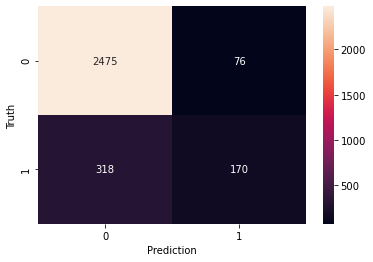

In [49]:
y_log_reg_predict = vanilla_model.predict(X_test)
ax = sns.heatmap(confusion_matrix(y_test, y_log_reg_predict), annot=True, fmt="d")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

In [50]:
print(f'LogisticRegression Model Coefficients: {vanilla_model.coef_}')

LogisticRegression Model Coefficients: [[-1.57384594e-02  1.16641285e-01 -4.58481886e-01  4.26167494e-01
   6.21158528e-01  2.99319879e-06 -9.22227287e-04 -1.23248429e-01
  -2.70411755e-04 -3.62814212e-01  1.12207317e-01 -1.01899609e-01
  -2.32752964e-02  2.62452593e-02 -1.75478770e-02 -2.68430770e-02
   1.00968363e-02  1.54255530e-02  2.62063096e-02  2.21036600e-02
  -8.67658052e-02  4.93027243e-02  2.56671286e-02  1.56015417e-02
  -4.10498011e-02 -4.05511315e-02  2.46238836e-03  6.00805113e-02
   1.37641989e-02 -3.41223924e-02  1.42074917e-02  3.42679587e-03
   2.67958125e-02]]


In [51]:
X_log_reg_imputed = bank_customers_preprocessed_imputed_df.drop('Churned_Customer', axis=1)
y_log_reg_imputed = bank_customers_preprocessed_imputed_df['Churned_Customer']
seed = 17
test_ratio = 0.3
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_log_reg_imputed, y_log_reg_imputed, test_size=test_ratio, random_state=seed, stratify=y_log_reg_imputed)
vanilla_model_imputed = LogisticRegression(random_state=seed)
vanilla_model_imputed.fit(X_train_imputed, y_train_imputed)
get_metrics_score(vanilla_model_imputed, X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed, True)

Accuracy on training set :  0.8789503386004515
Accuracy on test set :  0.872326423165515
Recall on training set :  0.3546971027216857
Recall on test set :  0.3319672131147541
Precision on training set :  0.7666034155597723
Precision on test set :  0.7232142857142857
F1-Score on training set :  0.4849939975990396
F1-Score on test set :  0.4550561797752809


[0.8789503386004515,
 0.872326423165515,
 0.3546971027216857,
 0.3319672131147541,
 0.7666034155597723,
 0.7232142857142857,
 0.4849939975990396,
 0.4550561797752809]

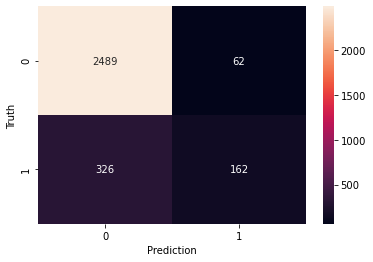

In [52]:
y_log_reg_imputed_predict = vanilla_model_imputed.predict(X_test_imputed)
ax = sns.heatmap(confusion_matrix(y_test_imputed, y_log_reg_imputed_predict), annot=True, fmt="d")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

In [53]:
print(f'LogisticRegression Model Coefficients: {vanilla_model_imputed.coef_}')

LogisticRegression Model Coefficients: [[-5.78044719e-03  1.44479481e-01 -5.08994099e-01  3.50342229e-01
   5.26145777e-01  3.93034482e-06 -9.02526225e-04 -6.79343565e-02
  -3.14898502e-04 -1.94694938e-01  4.02554305e-02 -2.66224561e-02
   6.63175905e-02 -5.63681162e-02  1.15349804e-02 -4.72816625e-02
   3.09096515e-02  1.47865049e-02 -1.25897112e-02  8.05664935e-03
   1.89337764e-03  1.25891585e-02]]


In [54]:
print('Model Scores (without imputation)\n')
get_metrics_score(vanilla_model, X_train, X_test, y_train, y_test, True)
print('\n\nModel Scores (with imputation)\n')
get_metrics_score(vanilla_model_imputed, X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed, True)

Model Scores (without imputation)

Accuracy on training set :  0.8748589164785553
Accuracy on test set :  0.870352089503126
Recall on training set :  0.3546971027216857
Recall on test set :  0.3483606557377049
Precision on training set :  0.7266187050359713
Precision on test set :  0.6910569105691057
F1-Score on training set :  0.47669616519174046
F1-Score on test set :  0.46321525885558584


Model Scores (with imputation)

Accuracy on training set :  0.8789503386004515
Accuracy on test set :  0.872326423165515
Recall on training set :  0.3546971027216857
Recall on test set :  0.3319672131147541
Precision on training set :  0.7666034155597723
Precision on test set :  0.7232142857142857
F1-Score on training set :  0.4849939975990396
F1-Score on test set :  0.4550561797752809


[0.8789503386004515,
 0.872326423165515,
 0.3546971027216857,
 0.3319672131147541,
 0.7666034155597723,
 0.7232142857142857,
 0.4849939975990396,
 0.4550561797752809]

# Wait a minute

We don't see any improvement or value in trying to impute the values (using KNNImputer) and for the rest of the models we will not be using the imputed values.

As I had highlighted in the beginning - we don't see much difference in test scores (apart from the benefit of dimensionality reduction)

## Next steps
1. Try to improve the model performance by Up and Downsampling - we will be using SMOTE and TomekLinks for up and downsmapling
2. Regularize the models to see improvements to the coefficients and reduction in model complexity.

In [55]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=seed)
X_train_up, y_train_up = smote.fit_resample(X_train, y_train)
vanilla_model_up = LogisticRegression()
vanilla_model_up.fit(X_train_up, y_train_up)
get_metrics_score(vanilla_model, X_train_up, X_test, y_train_up, y_test, True)

Accuracy on training set :  0.6390990082366784
Accuracy on test set :  0.870352089503126
Recall on training set :  0.30374852916456546
Recall on test set :  0.3483606557377049
Precision on training set :  0.922409392547218
Precision on test set :  0.6910569105691057
F1-Score on training set :  0.45700556398583714
F1-Score on test set :  0.46321525885558584


[0.6390990082366784,
 0.870352089503126,
 0.30374852916456546,
 0.3483606557377049,
 0.922409392547218,
 0.6910569105691057,
 0.45700556398583714,
 0.46321525885558584]

In [56]:
tomeklinks = TomekLinks()
X_train_down, y_train_down = tomeklinks.fit_resample(X_train, y_train)
vanilla_model_down = LogisticRegression()
vanilla_model_down.fit(X_train_down, y_train_down)
get_metrics_score(vanilla_model_down, X_train_down, X_test, y_train_down, y_test, True)

Accuracy on training set :  0.8747436273073542
Accuracy on test set :  0.8719973675551168
Recall on training set :  0.3713784021071115
Recall on test set :  0.35860655737704916
Precision on training set :  0.7526690391459074
Precision on test set :  0.6972111553784861
F1-Score on training set :  0.4973544973544972
F1-Score on test set :  0.4736129905277402


[0.8747436273073542,
 0.8719973675551168,
 0.3713784021071115,
 0.35860655737704916,
 0.7526690391459074,
 0.6972111553784861,
 0.4973544973544972,
 0.4736129905277402]

In [57]:
print(f'LogisticRegression Model Coefficients (Upsampled): {vanilla_model_up.coef_}')
print(f'LogisticRegression Model Coefficients (Downsampled): {vanilla_model_down.coef_}')

LogisticRegression Model Coefficients (Upsampled): [[ 1.42020429e-02  1.13458486e-01 -6.05516762e-01  4.99514202e-01
   8.74811687e-01  9.14637328e-06 -7.32608751e-04 -1.93808302e-02
  -2.20700771e-04 -2.73124433e-01 -1.24533238e-01 -3.60577063e-01
  -1.73049539e-01 -7.16028931e-02 -3.72260422e-01 -2.65544613e-01
  -8.38081220e-02 -2.06169471e-01 -2.06284627e-01 -1.00321590e-01
  -4.80214555e-01 -3.27739324e-01 -1.05227951e-01 -9.82516167e-02
  -2.48432462e-01 -2.21662191e-01 -1.95813958e-01 -1.91632915e-01
  -1.70943955e-01  4.74600634e-02 -1.16542497e-02 -2.56844223e-03
  -6.21850901e-02]]
LogisticRegression Model Coefficients (Downsampled): [[-8.15255098e-03  1.45086783e-01 -4.90083757e-01  3.68436022e-01
   5.63702745e-01  4.69860284e-06 -9.31919702e-04 -6.17643524e-02
  -3.18040647e-04 -1.98926244e-01  7.64912106e-02 -5.95939615e-02
  -1.34650416e-02  1.60832304e-02 -1.09190835e-02 -1.33838410e-02
   6.21245368e-03  1.34168576e-02  1.89526737e-02  1.30065527e-02
  -4.84945050e-02 

## Conclusion of resampling data experiment
We see better performance overall when we are using up-sampled data, next we will use the upsampled data to fit a ridge classifier. Because we have not used any kind of regularization hence we did not see any improvements in the model coefficients.

# Regularization
Let's try Ridge to reduce the model complexity - we have very high model coefficients that can benefit from regularization.

In [58]:
vanilla_ridge_classifier = RidgeClassifier(alpha=.3, random_state=seed)
vanilla_ridge_classifier.fit(X_train_up, y_train_up)
get_metrics_score(vanilla_ridge_classifier, X_train_up, X_test, y_train_up, y_test, True)
print(f'LogisticRegression Model Coefficients (Ridge): {vanilla_ridge_classifier.coef_}')

Accuracy on training set :  0.9069591527987897
Accuracy on test set :  0.8726554787759131
Recall on training set :  0.8176164061186754
Recall on test set :  0.24795081967213115
Precision on training set :  0.9954973393368809
Precision on test set :  0.8581560283687943
F1-Score on training set :  0.8978311029072449
F1-Score on test set :  0.3847376788553259
LogisticRegression Model Coefficients (Ridge): [[-2.71421009e-03  8.90144743e-04 -9.59816367e-02  6.65199801e-02
   8.58805516e-02  1.27278820e-06 -1.48459331e-04  1.59538538e-02
  -3.54699106e-05 -6.67301569e-01 -1.26686754e-02 -1.16755720e-01
  -7.66516686e-01 -6.83571905e-01 -6.65124168e-01 -6.77562932e-01
  -7.32956933e-01 -6.97705809e-01 -6.85788282e-01 -4.03500035e-01
  -3.64723952e-01 -3.36328800e-01 -3.95079163e-01 -3.80981159e-01
  -4.86127899e-01 -4.45414508e-01 -3.72805956e-01 -3.78762047e-01
  -4.97942459e-01 -1.44140932e-01 -1.28015602e-01 -9.28123956e-02
  -1.74684701e-01]]


In [59]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_up)
X_train_up_scaled = robust_scaler.transform(X_train_up)
X_test_scaled = robust_scaler.transform(X_test)
scaled_ridge_classifier = RidgeClassifier(alpha=.3, random_state=seed)
scaled_ridge_classifier.fit(X_train_up_scaled, y_train_up)
get_metrics_score(scaled_ridge_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)
print(f'LogisticRegression Model Coefficients (Ridge Scaled): {scaled_ridge_classifier.coef_}')

Accuracy on training set :  0.9069591527987897
Accuracy on test set :  0.8726554787759131
Recall on training set :  0.8176164061186754
Recall on test set :  0.24795081967213115
Precision on training set :  0.9954973393368809
Precision on test set :  0.8581560283687943
F1-Score on training set :  0.8978311029072449
F1-Score on test set :  0.3847376788553259
LogisticRegression Model Coefficients (Ridge Scaled): [[-0.02714045  0.00178101 -0.28790065  0.06651832  0.08587735  0.01070404
  -0.25190198  0.0039923  -0.09121137 -0.18156023 -0.01266986 -0.11674808
  -0.76650082 -0.68355361 -0.66511509 -0.67755117 -0.73295236 -0.69769304
  -0.68577539 -0.40349905 -0.36471955 -0.33632023 -0.39507492 -0.38098863
  -0.48612112 -0.44540765 -0.37280244 -0.37875463 -0.49792733 -0.14414914
  -0.12803689 -0.09283283 -0.17469956]]


# Model building - Logistic Regression (6 points): Conclusion

We built several Logistic Regression models:
* Without any changes to the default parameters with large feature set: We saw large coefficients indicating very complex model. The model performance is not very great especially recall - which means that model is struggling with true positive rate.
* With Upsampled & Downsampled data we saw that upsampled model was performing slightly better than downsampled model
* We used Ridge regularization to see if we can deal with large coefficients - while we saw some improvement in coefficients - we were able to control the coefficients nicely when we scaled the data using RobustScaler.

# Model building - Bagging and Boosting (8 points)
- Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models

## Build Decision tree

In [60]:
# Decision Tree Model - we will be using upsampled + scaled datapoints for building this model.
# data points: X_train_up_scaled, X_test_scaled, y_train_up, y_test
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)
decision_tree_classifier.fit(X_train_up_scaled,y_train_up)
get_metrics_score(decision_tree_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9002961500493584
Recall on training set :  1.0
Recall on test set :  0.7684426229508197
Precision on training set :  1.0
Precision on test set :  0.6637168141592921
F1-Score on training set :  1.0
F1-Score on test set :  0.7122507122507123


[1.0,
 0.9002961500493584,
 1.0,
 0.7684426229508197,
 1.0,
 0.6637168141592921,
 1.0,
 0.7122507122507123]

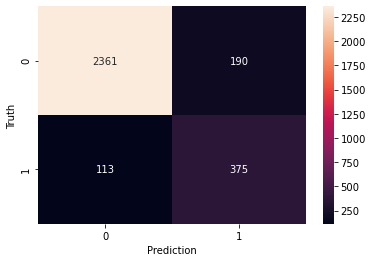

In [61]:
y_decision_tree_predict = decision_tree_classifier.predict(X_test_scaled)
ax = sns.heatmap(confusion_matrix(y_test, y_decision_tree_predict), annot=True, fmt="d")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

## Build Decision tree: Observations
- Model is overfitting
- Performing better than logistic regression

## Build Random Forest

In [62]:
# random forest classifier: we will be using upsampled + scaled datapoints for building this model.
random_forest_classifier = RandomForestClassifier(random_state=seed)
random_forest_classifier.fit(X_train_up_scaled,y_train_up)

#Calculating different metrics
get_metrics_score(random_forest_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9312273774267851
Recall on training set :  1.0
Recall on test set :  0.7192622950819673
Precision on training set :  1.0
Precision on test set :  0.8297872340425532
F1-Score on training set :  1.0
F1-Score on test set :  0.7705817782656422


[1.0,
 0.9312273774267851,
 1.0,
 0.7192622950819673,
 1.0,
 0.8297872340425532,
 1.0,
 0.7705817782656422]

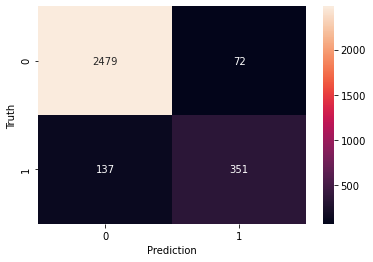

In [63]:
y_random_forest_predict = random_forest_classifier.predict(X_test_scaled)
ax = sns.heatmap(confusion_matrix(y_test, y_random_forest_predict), annot=True, fmt="d")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

## Build random Forest: Observations
- Model is overfitting
- Performing better than logistic regression & Decision Tree

## Build bagging classifier

In [64]:
# bagging classifier: we will be using upsampled + scaled datapoints for building this model.
bagging_classifier = BaggingClassifier(random_state=seed)
bagging_classifier.fit(X_train_up_scaled,y_train_up)

#Calculating different metrics
get_metrics_score(bagging_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)

Accuracy on training set :  0.9980669020003362
Accuracy on test set :  0.9305692662059888
Recall on training set :  0.9973104723482938
Recall on test set :  0.7930327868852459
Precision on training set :  0.9988215488215488
Precision on test set :  0.778672032193159
F1-Score on training set :  0.9980654386407604
F1-Score on test set :  0.7857868020304569


[0.9980669020003362,
 0.9305692662059888,
 0.9973104723482938,
 0.7930327868852459,
 0.9988215488215488,
 0.778672032193159,
 0.9980654386407604,
 0.7857868020304569]

## Build bagging classifier: Observations
- Model is overfitting but not like Decision Tree & Random Forest
- Performing better than all the previous models built so far.

## Build Xgboost

In [65]:
#xgboost classifier: we will be using upsampled + scaled datapoints for building this model.
xgb_classifier = XGBClassifier(random_state=seed, eval_metric='logloss')
xgb_classifier.fit(X_train_up_scaled,y_train_up)

#Calculating different metrics
get_metrics_score(xgb_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9562356038170451
Recall on training set :  1.0
Recall on test set :  0.8545081967213115
Precision on training set :  1.0
Precision on test set :  0.8705636743215032
F1-Score on training set :  1.0
F1-Score on test set :  0.8624612202688728


[1.0,
 0.9562356038170451,
 1.0,
 0.8545081967213115,
 1.0,
 0.8705636743215032,
 1.0,
 0.8624612202688728]

## Build Xgboost: Observations
- Model is overfitting
- Performing better than all the previous models built so far.

## Build AdaBoost

In [66]:
#adaboost classifier: we will be using upsampled + scaled datapoints for building this model.
adaboost_classifier = AdaBoostClassifier(random_state=seed)
adaboost_classifier.fit(X_train_up_scaled,y_train_up)

#Calculating different metrics
get_metrics_score(adaboost_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)

Accuracy on training set :  0.9502437384434359
Accuracy on test set :  0.9134583744652847
Recall on training set :  0.9485627836611196
Recall on test set :  0.7520491803278688
Precision on training set :  0.9517625231910947
Precision on test set :  0.7210216110019646
F1-Score on training set :  0.9501599595891564
F1-Score on test set :  0.7362086258776329


[0.9502437384434359,
 0.9134583744652847,
 0.9485627836611196,
 0.7520491803278688,
 0.9517625231910947,
 0.7210216110019646,
 0.9501599595891564,
 0.7362086258776329]

## Build AdaBoost: Observations
- Model is still overfitting but it is better than all the previous models built so far
- Performance on the test data is not very great and is slightly less than Xgboost.
- Model is generalizing better than Xgboost in the sense that delta between train and test performance is lower.

## Build Gradient Boosting Model:

In [67]:
#Fitting the model
gradient_boosting_classifier = GradientBoostingClassifier(random_state=1)
gradient_boosting_classifier.fit(X_train_up_scaled,y_train_up)

#Calculating different metrics
get_metrics_score(gradient_boosting_classifier, X_train_up_scaled, X_test_scaled, y_train_up, y_test, True)

Accuracy on training set :  0.9700790048747688
Accuracy on test set :  0.9424152681803225
Recall on training set :  0.9670532862665995
Recall on test set :  0.8381147540983607
Precision on training set :  0.9729409775071876
Precision on test set :  0.80990099009901
F1-Score on training set :  0.9699881976058001
F1-Score on test set :  0.823766364551863


[0.9700790048747688,
 0.9424152681803225,
 0.9670532862665995,
 0.8381147540983607,
 0.9729409775071876,
 0.80990099009901,
 0.9699881976058001,
 0.823766364551863]

## Build Build Gradient Boosting Model: Observations
- Model is still overfitting but it is comparable to Adaboost but test scores are better than Adaboost
- Performance on the test data is comparable with Xgboost.
- Model is generalizing better than Xgboost & Adaboost in the sense that delta between train and test performance is lower and the model is not perfectly fit to training data.

## Find the top 3 best performing models
- We will find the best 3 models for the next step - i.e. hyperparameter tuning using GridSearchCV.
- We will focus on Recall as the metric of choice as we are interested in true positive rate of the model.

In [68]:
# all the models built so far
models = [decision_tree_classifier,random_forest_classifier,bagging_classifier,xgb_classifier,adaboost_classifier,gradient_boosting_classifier]
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

for model in models:
    j = get_metrics_score(model, X_train_up_scaled, X_test_scaled, y_train_up, y_test, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

comparison_frame = pd.DataFrame({'Model':
                                 ['decision_tree_classifier',
                                  'random_forest_classifier',
                                  'bagging_classifier',
                                  'xgb_classifier',
                                  'adaboost_classifier',
                                  'gradient_boosting_classifier'], 
                                  'Train_Accuracy': acc_train,
                                  'Test_Accuracy': acc_test,
                                  'Train_Recall':recall_train,'Test_Recall':recall_test,
                                  'Train_Precision':precision_train,'Test_Precision':precision_test,
                                  'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test})
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
3                xgb_classifier        1.000000       0.956236      1.000000   
5  gradient_boosting_classifier        0.970079       0.942415      0.967053   
2            bagging_classifier        0.998067       0.930569      0.997310   
0      decision_tree_classifier        1.000000       0.900296      1.000000   
4           adaboost_classifier        0.950244       0.913458      0.948563   
1      random_forest_classifier        1.000000       0.931227      1.000000   

   Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
3     0.854508         1.000000        0.870564        1.000000       0.862461  
5     0.838115         0.972941        0.809901        0.969988       0.823766  
2     0.793033         0.998822        0.778672        0.998065       0.785787  
0     0.768443         1.000000        0.663717        1.000000       0.712251  
4     0.752049         0.951763        0.721022        0.950160       0.736209  
1     0.719262         1.000000        0.829787        1.000000       0.770582

## Best 3 models
Based the metric of our choice ```Recall``` we can say that the top 3 models are:
1. XgBoost Classifier: This model has the best accuracy, recall, precision & F1 score on the Test data, the model is overfitting and we can try & tune the hyperparameters to improve this.
2. Gradient Boosting Classifier: This is the second best model in terms of recall scores. Accuracy, precision and F1 scores are also better than most of models (except for the precison - which is less than XgBoost and Random Forest models)
3. Bagging Classifier: Finally we see bagging classifier which has the third best score in terms of recall, F1 score is also 3rd best among all models.

**All these models are overfitting the test data but we should be able optimize the hyperparameters to fix that**

# Hyperparameter tuning using grid search (8 points)

- Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning

## XGBoost Grid Search CV Pipeline

We will have the following steps in xgboost hyper-parameter tuning pipeline
- RobustScaler - to scale values
- XgBoostClassifier

We will experiment with following hyper-parameters
- n_estimators: XGB
- scale_pos_weight: XGB
- subsample: XGB
- learning_rate: XGB
- colsample_bytree: XGB
- colsample_bylevel: XGB

In [69]:
xg_boost_parameters = {
    "xgb__n_estimators": [15,30,50],
    "xgb__subsample":[0.7,0.9,1],
    "xgb__learning_rate":[0.05,0.1,0.2],
    "xgb__colsample_bytree":[0.7,0.9,1],
    "xgb__colsample_bylevel":[0.5,0.7,1]
}

xg_boost_scorer = make_scorer(recall_score)
xgb_classifier_pipeline = XGBClassifier(random_state=seed, eval_metric='logloss')
pipeline_xgb = Pipeline([('scaler', RobustScaler()), ('xgb', xgb_classifier_pipeline)])
xgb_grid = GridSearchCV( pipeline_xgb , param_grid = xg_boost_parameters, cv = 5)
xgb_grid.fit(X_train_up, y_train_up)
print(" Best cross-validation accuracy: {:.2f}". format( xgb_grid.best_score_)) 
print(" Best parameters: ", xgb_grid.best_params_)
print(" Test set accuracy: {:.2f}". format( xgb_grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.95
 Best parameters:  {'xgb__colsample_bylevel': 1, 'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.05, 'xgb__n_estimators': 50, 'xgb__subsample': 1}
 Test set accuracy: 0.94


## Gradient Boosting Grid Search CV Pipeline
We will have the following steps in Gradient Boosting Classifier hyper-parameter tuning pipeline
- RobustScaler - to scale values
- GradientBoostingClassifier

We will experiment with the following parameters
- n_estimators: Gradient Boosting
- subsample: Gradient Boosting
- max_features: Gradient Boosting

In [70]:
g_boost_parameters = {
    "gb__n_estimators": [100,150,200],
    "gb__subsample":[0.8,0.9,1],
    "gb__max_features":[0.7,0.9,1]
}
g_boost_scorer = make_scorer(recall_score)
g_boost_classifier_pipeline = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
pipeline_gb = Pipeline([('scaler', RobustScaler()), ('gb', g_boost_classifier_pipeline)])

gb_grid = GridSearchCV(pipeline_gb , param_grid = g_boost_parameters, cv = 5)
gb_grid.fit(X_train_up, y_train_up)
print(" Best cross-validation accuracy: {:.2f}". format( gb_grid.best_score_)) 
print(" Best parameters: ", gb_grid.best_params_) 
print(" Test set accuracy: {:.2f}". format(gb_grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.93
 Best parameters:  {'gb__max_features': 0.9, 'gb__n_estimators': 150, 'gb__subsample': 0.9}
 Test set accuracy: 0.94


## Bagging Classifier Pipeline
We will have the following steps in Gradient Boosting Classifier hyper-parameter tuning pipeline

* RobustScaler - to scale values
* BaggingClassifier

We will experiment with the following parameters

- max_samples: Bagging Classifier
- max_features: Bagging Classifier
- n_estimators: Bagging Classifier

In [71]:
bagging_parameters = {
    'bagging__max_samples': [0.7,0.8,0.9,1],
    'bagging__max_features': [0.7,0.8,0.9,1],
    'bagging__n_estimators' : [10,20,30,40,50]
}
bagging_scorer = make_scorer(recall_score)
bagging_classifier_pipeline = BaggingClassifier(random_state=seed, n_jobs=-1)
pipeline_bagging = Pipeline([('scaler', RobustScaler()), ('bagging', bagging_classifier_pipeline)])

bagging_grid = GridSearchCV(pipeline_bagging , param_grid = bagging_parameters, cv = 5)
bagging_grid.fit(X_train_up, y_train_up)
print(" Best cross-validation accuracy: {:.2f}". format( bagging_grid.best_score_)) 
print(" Best parameters: ", bagging_grid.best_params_) 
print(" Test set accuracy: {:.2f}". format(bagging_grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.96
 Best parameters:  {'bagging__max_features': 0.7, 'bagging__max_samples': 0.7, 'bagging__n_estimators': 50}
 Test set accuracy: 0.95


# Hyperparameter tuning using random search (8 points)

- Tune the best 3 models using random search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning

## Models chosen
1. XgBoost
2. Gradient Boosting Classifier
3. Bagging Classifier:

The reason for choosing these models is already listed above.

## XGBoost Random Search CV Pipeline

We will have the following steps in xgboost hyper-parameter tuning pipeline
- RobustScaler - to scale values
- XgBoostClassifier

We will experiment with following hyper-parameters
- n_estimators: XGB
- subsample: XGB
- learning_rate: XGB
- colsample_bytree: XGB
- colsample_bylevel: XGB

In [72]:
xg_boost_parameters_random = {
    "xgb__n_estimators": stats.randint(10, 60),
    "xgb__subsample":stats.uniform(0, 1),
    "xgb__learning_rate":stats.uniform(0, 1),
    "xgb__colsample_bytree":stats.uniform(0, 1),
    "xgb__colsample_bylevel":stats.uniform(0, 1)
}

xg_boost_scorer_random = make_scorer(recall_score)
xgb_classifier_pipeline_random = XGBClassifier(random_state=seed, eval_metric='logloss')
pipeline_xgb_random = Pipeline([('scaler', RobustScaler()),('xgb', xgb_classifier_pipeline_random)])
iterations = 3  # number of random samples 
xgb_randomCV = RandomizedSearchCV(pipeline_xgb_random, param_distributions=xg_boost_parameters_random, n_iter=iterations) #default cv = 3
xgb_randomCV.fit(X_train_up, y_train_up)
print(" Best cross-validation accuracy: {:.2f}". format( xgb_randomCV.best_score_)) 
print(" Best parameters: ", xgb_randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( xgb_randomCV.score( X_test, y_test)))

 Best cross-validation accuracy: 0.93
 Best parameters:  {'xgb__colsample_bylevel': 0.5732773571900898, 'xgb__colsample_bytree': 0.1886310702038969, 'xgb__learning_rate': 0.220612845670634, 'xgb__n_estimators': 25, 'xgb__subsample': 0.9277444008033617}
 Test set accuracy: 0.91


## Gradient Boost Random Search CV Pipeline

We will have the following steps in Gradient Boosting Classifier hyper-parameter tuning pipeline
- RobustScaler - to scale values
- GradientBoostingClassifier

We will experiment with the following parameters
- n_estimators: Gradient Boosting
- subsample: Gradient Boosting
- max_features: Gradient Boosting

In [73]:
g_boost_parameters_random = {
    "gb__n_estimators": stats.randint(10, 200),
    "gb__subsample":stats.uniform(0, 1),
    "gb__max_features":stats.uniform(0, 1)
}
g_boost_scorer_random = make_scorer(recall_score)
g_boost_classifier_pipeline_random = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
pipeline_gb_random = Pipeline([('scaler', RobustScaler()), ('gb', g_boost_classifier_pipeline_random)])
iterations = 5  # number of random samples 
gb_randomCV = RandomizedSearchCV(pipeline_gb_random, param_distributions=g_boost_parameters_random, n_iter=iterations) #default cv = 3
gb_randomCV.fit(X_train_up, y_train_up)
print(" Best cross-validation accuracy: {:.2f}". format( gb_randomCV.best_score_)) 
print(" Best parameters: ", gb_randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format(gb_randomCV.score( X_test, y_test)))

 Best cross-validation accuracy: 0.92
 Best parameters:  {'gb__max_features': 0.6400122615391389, 'gb__n_estimators': 195, 'gb__subsample': 0.3516319193958908}
 Test set accuracy: 0.95


## Bagging Random Search CV Pipeline

* RobustScaler - to scale values
* BaggingClassifier

We will experiment with the following parameters

- max_samples: Bagging Classifier
- max_features: Bagging Classifier
- n_estimators: Bagging Classifier

In [74]:
bagging_parameters_random = {
    'bagging__max_samples': stats.uniform(0, 1),
    'bagging__max_features': stats.uniform(0, 1),
    'bagging__n_estimators' : stats.randint(5, 100)
}
bagging_scorer_random = make_scorer(recall_score)
bagging_classifier_pipeline_random = BaggingClassifier(random_state=seed, n_jobs=-1)
pipeline_bagging_random = Pipeline([('scaler', RobustScaler()), ('bagging', bagging_classifier_pipeline_random)])
bagging_randomCV = RandomizedSearchCV(pipeline_bagging_random, param_distributions=bagging_parameters_random, n_iter=iterations) #default cv = 3
bagging_randomCV.fit(X_train_up, y_train_up)
print(" Best cross-validation accuracy: {:.2f}". format( bagging_randomCV.best_score_)) 
print(" Best parameters: ", bagging_randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format(bagging_randomCV.score( X_test, y_test)))

 Best cross-validation accuracy: 0.95
 Best parameters:  {'bagging__max_features': 0.34362732071266944, 'bagging__max_samples': 0.7353429954950012, 'bagging__n_estimators': 92}
 Test set accuracy: 0.93


# Model Performance Comparision

We have built the following models using Cross Validation.

Now let us compare all the models that we have built so far.

In [75]:
models_cv = [
    xgb_grid,
    gb_grid,
    bagging_grid,
    xgb_randomCV,
    gb_randomCV,
    bagging_randomCV,]
acc_train_cv = []
acc_test_cv = []
recall_train_cv = []
recall_test_cv = []
precision_train_cv = []
precision_test_cv = []
f1_train_cv = [] 
f1_test_cv = []

for model in models_cv:
    start = time.time()
    model.fit(X_train_up, y_train_up)
    end = time.time()
    print(f'\nModel: {model}\n\tTime Taken: {end - start}')
    j = get_metrics_score(model, X_train_up, X_test, y_train_up, y_test, False)
    acc_train_cv.append(j[0])
    acc_test_cv.append(j[1])
    recall_train_cv.append(j[2])
    recall_test_cv.append(j[3])
    precision_train_cv.append(j[4])
    precision_test_cv.append(j[5])
    f1_train_cv.append(j[6])
    f1_test_cv.append(j[7])

comparison_frame_cv = pd.DataFrame({'Model':
                                 ['Pipeline XGB Grid Search',
                                  'Pipeline Gradient Boosting Grid Search',
                                  'Pipeline Bagging Grid Search',
                                  'Pipeline XGB Random Search',
                                  'Pipeline Gradient Boosting Random Search',
                                  'Pipeline Bagging Random Search'], 
                                  'Train_Accuracy': acc_train_cv,
                                  'Test_Accuracy': acc_test_cv,
                                  'Train_Recall':recall_train_cv,'Test_Recall':recall_test_cv,
                                  'Train_Precision':precision_train_cv,'Test_Precision':precision_test_cv,
                                  'Train_F1-Score':f1_train_cv, 'Test_F1-Score':f1_test_cv})
#Sorting models in decreasing order of test recall
comparison_frame_cv.sort_values(by='Test_Recall',ascending=False)


Model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      eval_metric='logloss',
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                     

Model  Train_Accuracy  Test_Accuracy  \
0                  Pipeline XGB Grid Search        0.969323       0.938138   
3                Pipeline XGB Random Search        0.969827       0.935505   
1    Pipeline Gradient Boosting Grid Search        0.976214       0.944719   
4  Pipeline Gradient Boosting Random Search        0.950748       0.929253   
2              Pipeline Bagging Grid Search        0.999496       0.946035   
5            Pipeline Bagging Random Search        0.988822       0.934518   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
0      0.973777     0.893443         0.965178        0.762238        0.969459   
3      0.971088     0.838115         0.968645        0.777567        0.969865   
1      0.971256     0.825820         0.980985        0.829218        0.976096   
4      0.947386     0.823770         0.953799        0.757062        0.950582   
2      0.999664     0.817623         0.999328        0.841772        0.999496   
5      0.987057     0.774590         0.990553        0.809422        0.988802   

   Test_F1-Score  
0       0.822642  
3       0.806706  
1       0.827515  
4       0.789009  
2       0.829522  
5       0.791623

# Model Performances

- Model performances have generalized after hyperparameter tuning using cross validation.
- I wanted to add PCA & regularization steps as well to the pipeline steps but due to extreme computation requirements (and lack of time before the deadline - I had to let it go - thanks to GridSearch CV - which is painfully slow).
- I have timed the time it takes for each model tuning using GridSearchCV & RandomizedSearchCV techniques and as can be seen from the above output logs - GridSearchCV is very slow and doesn't offer better results than RandomizedSearchCV.
- I think that focusing on the dimensionality reduction could help in generalizing the models better (right now most of the models are overfiiting - despite the tuning of the parameters.
- In terms of running times of GridSearchCV vs RandomSearchCV we can say that with our models RandomSearchCV is around 3-15 time slower than RandomSearch CV.

## Runtime of different pipelines using GridSearchCV vs RandomSearchCV

|Cross Validation          | Algorithm            | Recall (Test)   | Time Taken (seconds)   |
|:------------------------:|:--------------------:|:---------------:|:----------------------:|
| Grid Search              | XgBoost              | 0.893443        | 253.600                |
| Grid Search              | GradientBoosting     | 0.825820        | 260.886                |
| Grid Search              | Bagging              | 0.817623        | 131.424                |
| Random Search            | XgBoost              | 0.838115        | 2.392                  |
| Random Search            | GradientBoosting     | 0.823770	    | 27.524                 |
| Random Search            | Bagging              | 0.774590        | 6.710                  |

# Actionable Insights & Recommendations (5 points)
- Business recommendations and insights

Based on the analysis of data and building several predictive models around the data we can propose the following actionable insights.

1. Bank should promote customer spending in order to mitigate customer churn, new schemes such as cashback offers and discounts can be launched to provide an incentive for the customers to spend more using the credit cards.
2. Total number of products held by a customer also affects their probability of churn - the bank can club various products as combos to get customers vested into the ecosystem of the products.
3. Bank should try to minimize the customer contact by analyzing processes which result in customer contact/escalation, such processes or products need to be optimized.

# Notebook - Overall quality (4 points)
- Structure and flow - Well commented code

My notebook follows the logical progression of action items specified in the project guidelines.
I would like to highlight some of the areas where I have spent considerable amount of time.

- Explaining the choices that I made during the model building and highlighted the trade-offs for each choice.
- I have no clutter in terms of variable & function names.
- The insights from data are studied from several vantage points to make sure that I don't miss any critical point.
- I have explained the dataset in great detail and have also taken into account that understanding when building models.
- I have supported my theories with data and results by running experiments (for example imputation of 'Unknown' values is various categorical columns)
- I have provided additional instructions to setup the same environment as I have to be able to consistently reproduce the results.